In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import gc
from sklearn.preprocessing import OneHotEncoder
train_id=pd.read_csv('C:/Users/MSI/fraud/train_identity.csv')
train_trans=pd.read_csv('C:/Users/MSI/fraud/train_transaction.csv')
test_id=pd.read_csv('C:/Users/MSI/fraud/train_identity.csv')
test_trans=pd.read_csv('C:/Users/MSI/fraud/test_transaction.csv')
submission_sample=pd.read_csv('C:/Users/MSI/fraud/sample_submission.csv')

EDA PART


In [2]:
train_trans= train_trans.merge(train_id, on="TransactionID", how="left")
test_trans= test_trans.merge(test_id, on="TransactionID", how="left")

In [3]:

pd.set_option('display.max_columns',None)

In [4]:
train_trans

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
0             2987000        0          86400           68.50         W   
1             2987001        0          86401           29.00         W   
2             2987002        0          86469           59.00         W   
3             2987003        0          86499           50.00         W   
4             2987004        0          86506           50.00         H   
...               ...      ...            ...             ...       ...   
590535        3577535        0       15811047           49.00         W   
590536        3577536        0       15811049           39.50         W   
590537        3577537        0       15811079           30.95         W   
590538        3577538        0       15811088          117.00         W   
590539        3577539        0       15811131          279.95         W   

        card1  card2  card3       card4  card5   card6  addr1  addr2  dist1  \
0       13926    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0   
1        2755  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN   
2        4663  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0   
3       18132  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN   
4        4497  514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN   
...       ...    ...    ...         ...    ...     ...    ...    ...    ...   
590535   6550    NaN  150.0        visa  226.0   debit  272.0   87.0   48.0   
590536  10444  225.0  150.0  mastercard  224.0   debit  204.0   87.0    NaN   
590537  12037  595.0  150.0  mastercard  224.0   debit  231.0   87.0    NaN   
590538   7826  481.0  150.0  mastercard  224.0   debit  387.0   87.0    3.0   
590539  15066  170.0  150.0  mastercard  102.0  credit  299.0   87.0    NaN   

        dist2 P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7  \
0         NaN           NaN           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
1         NaN     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
2         NaN   outlook.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
3         NaN     yahoo.com           NaN  2.0  5.0  0.0  0.0  0.0  4.0  0.0   
4         NaN     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
...       ...           ...           ...  ...  ...  ...  ...  ...  ...  ...   
590535    NaN           NaN           NaN  2.0  1.0  0.0  0.0  1.0  0.0  0.0   
590536    NaN     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
590537    NaN     gmail.com           NaN  1.0  1.0  0.0  0.0  1.0  1.0  0.0   
590538    NaN       aol.com           NaN  1.0  1.0  0.0  0.0  0.0  3.0  0.0   
590539    NaN     gmail.com           NaN  2.0  1.0  0.0  0.0  1.0  1.0  0.0   

         C8   C9  C10  C11  C12   C13  C14     D1     D2    D3    D4   D5  D6  \
0       0.0  1.0  0.0  2.0  0.0   1.0  1.0   14.0    NaN  13.0   NaN  NaN NaN   
1       0.0  0.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN   
2       0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN   
3       0.0  1.0  0.0  1.0  0.0  25.0  1.0  112.0  112.0   0.0  94.0  0.0 NaN   
4       1.0  0.0  1.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   NaN  NaN NaN   
...     ...  ...  ...  ...  ...   ...  ...    ...    ...   ...   ...  ...  ..   
590535  0.0  2.0  0.0  1.0  0.0   3.0  2.0   29.0   29.0  30.0   NaN  NaN NaN   
590536  0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN   
590537  0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN   
590538  0.0  2.0  0.0  1.0  1.0   5.0  1.0   22.0   22.0   0.0  22.0  0.0 NaN   
590539  0.0  2.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   0.0   1.0  0.0 NaN   

        D7  D8  D9   D10    D11  D12  D13  D14    D15   M1   M2   M3   M4  \
0      NaN NaN NaN  13.0   13.0  NaN  NaN  NaN    0.0    T    T    T   M2   
1      NaN NaN NaN   0.0    NaN  NaN  NaN  NaN    0.0  NaN  NaN  NaN  

In [5]:
train_trans.describe()

TransactionID        isFraud  TransactionDT  TransactionAmt  \
count   5.905400e+05  590540.000000   5.905400e+05   590540.000000   
mean    3.282270e+06       0.034990   7.372311e+06      135.027176   
std     1.704744e+05       0.183755   4.617224e+06      239.162522   
min     2.987000e+06       0.000000   8.640000e+04        0.251000   
25%     3.134635e+06       0.000000   3.027058e+06       43.321000   
50%     3.282270e+06       0.000000   7.306528e+06       68.769000   
75%     3.429904e+06       0.000000   1.124662e+07      125.000000   
max     3.577539e+06       1.000000   1.581113e+07    31937.391000   

               card1          card2          card3          card5  \
count  590540.000000  581607.000000  588975.000000  586281.000000   
mean     9898.734658     362.555488     153.194925     199.278897   
std      4901.170153     157.793246      11.336444      41.244453   
min      1000.000000     100.000000     100.000000     100.000000   
25%      6019.000000     214.000000     150.000000     166.000000   
50%      9678.000000     361.000000     150.000000     226.000000   
75%     14184.000000     512.000000     150.000000     226.000000   
max     18396.000000     600.000000     231.000000     237.000000   

               addr1          addr2          dist1         dist2  \
count  524834.000000  524834.000000  238269.000000  37627.000000   
mean      290.733794      86.800630     118.502180    231.855423   
std       101.741072       2.690623     371.872026    529.053494   
min       100.000000      10.000000       0.000000      0.000000   
25%       204.000000      87.000000       3.000000      7.000000   
50%       299.000000      87.000000       8.000000     37.000000   
75%       330.000000      87.000000      24.000000    206.000000   
max       540.000000     102.000000   10286.000000  11623.000000   

                  C1             C2             C3             C4  \
count  590540.000000  590540.000000  590540.000000  590540.000000   
mean       14.092458      15.269734       0.005644       4.092185   
std       133.569018     154.668899       0.150536      68.848459   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.000000       0.000000       0.000000   
50%         1.000000       1.000000       0.000000       0.000000   
75%         3.000000       3.000000       0.000000       0.000000   
max      4685.000000    5691.000000      26.000000    2253.000000   

                  C5             C6             C7             C8  \
count  590540.000000  590540.000000  590540.000000  590540.000000   
mean        5.571526       9.071082       2.848478       5.144574   
std        25.786976      71.508467      61.727304      95.378574   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       1.000000       0.000000       0.000000   
50%         0.000000       1.000000       0.000000       0.000000   
75%         1.000000       2.000000       0.000000       0.000000   
max       349.000000    2253.000000    2255.000000    3331.000000   

                  C9            C10            C11            C12  \
count  590540.000000  590540.000000  590540.000000  590540.000000   
mean        4.480240       5.240343      10.241521       4.076227   
std        16.674897      95.581443      94.336292      86.666218   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       1.000000       0.000000   
50%         1.000000       0.000000       1.000000       0.000000   
75%         2.000000       0.000000       2.000000       0.000000   
max       210.000000    3257.000000    3188.000000    3188.000000   

                 C13            C14             D1             D2  \
count  590540.000000  590540.000000  589271.000000  309743.000000   
mean       32.539918       8.295215      94.347568     169.563231   
std       129.364844      49.544262     157.660387     177.315865   

In [6]:
test_trans

TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0             3663549       18403224          31.950         W  10409  111.0   
1             3663550       18403263          49.000         W   4272  111.0   
2             3663551       18403310         171.000         W   4476  574.0   
3             3663552       18403310         284.950         W  10989  360.0   
4             3663553       18403317          67.950         W  18018  452.0   
...               ...            ...             ...       ...    ...    ...   
506686        4170235       34214279          94.679         C  13832  375.0   
506687        4170236       34214287          12.173         C   3154  408.0   
506688        4170237       34214326          49.000         W  16661  490.0   
506689        4170238       34214337         202.000         W  16621  516.0   
506690        4170239       34214345          24.346         C   5713  168.0   

        card3       card4  card5   card6  addr1  addr2   dist1  dist2  \
0       150.0        visa  226.0   debit  170.0   87.0     1.0    NaN   
1       150.0        visa  226.0   debit  299.0   87.0     4.0    NaN   
2       150.0        visa  226.0   debit  472.0   87.0  2635.0    NaN   
3       150.0        visa  166.0   debit  205.0   87.0    17.0    NaN   
4       150.0  mastercard  117.0   debit  264.0   87.0     6.0    NaN   
...       ...         ...    ...     ...    ...    ...     ...    ...   
506686  185.0  mastercard  224.0   debit  284.0   60.0     NaN    NaN   
506687  185.0  mastercard  224.0   debit    NaN    NaN     NaN  157.0   
506688  150.0        visa  226.0   debit  327.0   87.0     NaN    NaN   
506689  150.0  mastercard  224.0   debit  177.0   87.0     NaN    NaN   
506690  144.0        visa  147.0  credit    NaN    NaN     NaN    NaN   

       P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8  \
0          gmail.com           NaN  6.0  6.0  0.0  0.0  3.0  4.0  0.0  0.0   
1            aol.com           NaN  3.0  2.0  0.0  0.0  0.0  1.0  0.0  0.0   
2        hotmail.com           NaN  2.0  2.0  0.0  0.0  0.0  5.0  0.0  0.0   
3          gmail.com           NaN  5.0  2.0  0.0  0.0  1.0  1.0  0.0  0.0   
4          gmail.com           NaN  6.0  6.0  0.0  0.0  2.0  5.0  0.0  0.0   
...              ...           ...  ...  ...  ...  ...  ...  ...  ...  ...   
506686     gmail.com     gmail.com  1.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0   
506687   hotmail.com   hotmail.com  1.0  3.0  0.0  1.0  0.0  1.0  1.0  2.0   
506688   hotmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
506689   hotmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
506690   hotmail.com   hotmail.com  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0   

         C9  C10  C11  C12    C13  C14     D1     D2    D3     D4    D5    D6  \
0       6.0  0.0  5.0  1.0  115.0  6.0  419.0  419.0  27.0  398.0  27.0   NaN   
1       2.0  0.0  1.0  1.0   12.0  2.0  149.0  149.0   7.0  634.0   7.0   NaN   
2       4.0  0.0  2.0  0.0   22.0  2.0  137.0  137.0  10.0   97.0  10.0   NaN   
3       2.0  0.0  2.0  0.0    7.0  4.0   42.0   42.0  41.0  242.0  41.0   NaN   
4       5.0  0.0  6.0  0.0   14.0  6.0   22.0   22.0   0.0   22.0   0.0   NaN   
...     ...  ...  ...  ...    ...  ...    ...    ...   ...    ...   ...   ...   
506686  0.0  0.0  1.0  1.0    1.0  1.0    0.0    NaN   NaN    0.0   NaN   0.0   
506687  0.0  2.0  1.0  1.0    3.0  1.0   16.0   16.0  16.0   16.0  16.0  16.0   
506688  1.0  0.0  1.0  0.0    1.0  1.0    0.0    NaN   NaN    0.0   NaN   NaN   
506689  1.0  0.0  1.0  0.0    1.0  1.0    0.0    NaN   NaN    0.0   NaN   NaN   
506690  0.0  1.0  1.0  1.0    1.0  1.0    0.0    NaN   NaN    0.0   NaN   0.0   

          D7         D8        D9    D10    D11   D12  D13  D14    D15   M1  \
0        NaN        NaN       NaN  418.0  203.0   NaN  NaN  NaN  409.0    T   
1        NaN        NaN       NaN  231.0  634.0   NaN  NaN  NaN  634.0    T   
2        NaN        NaN

In [7]:
test_trans.describe()

TransactionID  TransactionDT  TransactionAmt          card1  \
count   5.066910e+05   5.066910e+05   506691.000000  506691.000000   
mean    3.916894e+06   2.692994e+07      134.725568    9957.222175   
std     1.462692e+05   4.756507e+06      245.779822    4884.960969   
min     3.663549e+06   1.840322e+07        0.018000    1001.000000   
25%     3.790222e+06   2.277154e+07       40.000000    6019.000000   
50%     3.916894e+06   2.720466e+07       67.950000    9803.000000   
75%     4.043566e+06   3.134856e+07      125.000000   14276.000000   
max     4.170239e+06   3.421434e+07    10270.000000   18397.000000   

               card2          card3          card5          addr1  \
count  498037.000000  503689.000000  502144.000000  441082.000000   
mean      363.735379     153.543409     200.162975     291.846514   
std       158.688653      12.443013      40.562461     102.062730   
min       100.000000     100.000000     100.000000     100.000000   
25%       207.000000     150.000000     166.000000     204.000000   
50%       369.000000     150.000000     226.000000     299.000000   
75%       512.000000     150.000000     226.000000     330.000000   
max       600.000000     232.000000     237.000000     540.000000   

               addr2          dist1         dist2             C1  \
count  441082.000000  215474.000000  36436.000000  506688.000000   
mean       86.723412      87.065270    237.175047      10.093211   
std         2.987328     314.131694    556.450834      79.334782   
min        10.000000       0.000000      0.000000       0.000000   
25%        87.000000       3.000000      7.000000       1.000000   
50%        87.000000       8.000000     44.000000       1.000000   
75%        87.000000      20.000000    196.000000       3.000000   
max       102.000000    8081.000000   9213.000000    2950.000000   

                  C2             C3             C4             C5  \
count  506688.000000  506688.000000  506688.000000  506688.000000   
mean       10.714635       0.027403       2.385875       4.962701   
std        88.896921       0.227753      41.942977      25.462195   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       0.000000       0.000000   
50%         1.000000       0.000000       0.000000       0.000000   
75%         3.000000       0.000000       1.000000       1.000000   
max      3275.000000      31.000000    1601.000000     376.000000   

                  C6             C7             C8             C9  \
count  506688.000000  506688.000000  506688.000000  506688.000000   
mean        6.854992       1.678173       1.893994       4.611943   
std        46.783565      37.874827      26.766115      21.282640   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       0.000000       0.000000   
50%         1.000000       0.000000       0.000000       1.000000   
75%         2.000000       0.000000       1.000000       2.000000   
max      1601.000000    1621.000000    1005.000000     572.000000   

                 C10            C11            C12            C13  \
count  506688.000000  506688.000000  506688.000000  501943.000000   
mean        1.810149       7.484594       2.649486      27.816035   
std        23.692393      61.322505      53.973060     101.114033   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       1.000000       0.000000       1.000000   
50%         0.000000       1.000000       0.000000       3.000000   
75%         1.000000       2.000000       1.000000      13.000000   
max       881.000000    2234.000000    2234.000000    1562.000000   

                 C14             D1             D2             D3  \
count  506688.000000  500660.000000  271922.000000  303549.000000   
mean        6.083890     108.207504     188.666621      33.394727   
std        28.315616     176.964526     197.099611      82.558210   

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [9]:
columns = list(train_trans.columns)
unique_columns = []
[unique_columns.append(column) for column in columns if column not in unique_columns]
print(f"nombre de features uniques : {len(unique_columns)}")
print(f"\n shape of train_trans : {train_trans.shape}")

nombre de features uniques : 434

 shape of train_trans : (590540, 434)


In [10]:
columns = list(test_trans.columns)
unique_columns = []
[unique_columns.append(column) for column in columns if column not in unique_columns]
print(f"nombre de features uniques : {len(unique_columns)}")
print(f"\n shape of test_trans : {test_trans.shape}")

nombre de features uniques : 433

 shape of test_trans : (506691, 433)


<Axes: xlabel='isFraud', ylabel='count'>

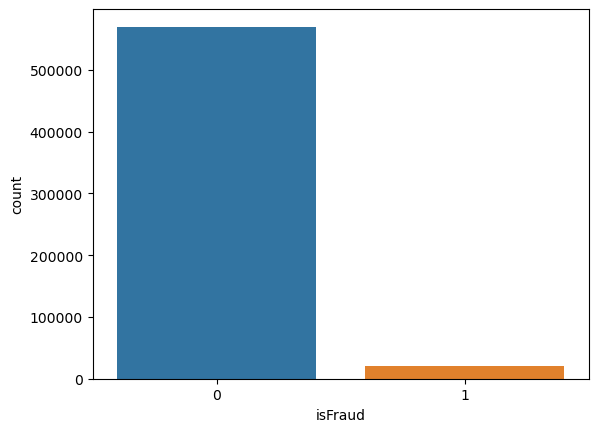

In [11]:
sns.countplot(data=train_trans, x='isFraud')

we have an extremely unbalanced data set with a small protion of fraud transactions .Therefore, we will use Stratified K-fold validation.

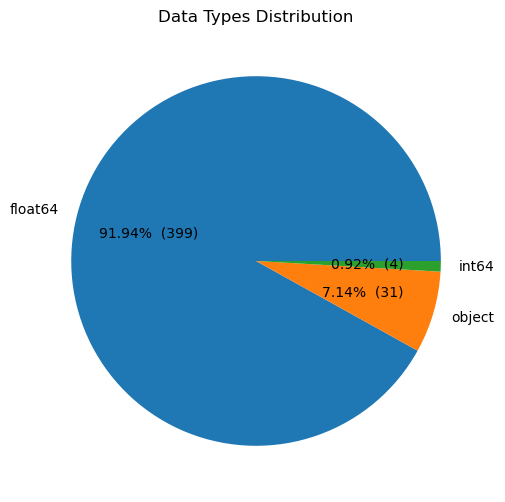

In [12]:
#visualizing data types distribution
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
counts =train_trans.dtypes.value_counts()
ax.pie(counts.values, labels=counts.index, autopct=lambda p: '{:.2f}%  ({:,.0f})'.format(p, p * sum(counts.values) / 100))
ax.set_title('Data Types Distribution')
plt.show()


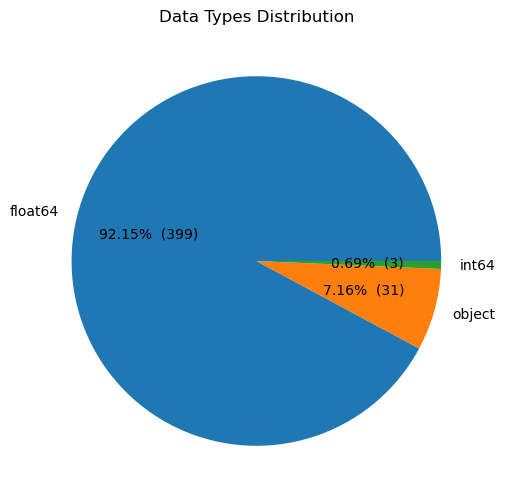

In [13]:
#visualizing data types distribution
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
counts =test_trans.dtypes.value_counts()
ax.pie(counts.values, labels=counts.index, autopct=lambda p: '{:.2f}%  ({:,.0f})'.format(p, p * sum(counts.values) / 100))
ax.set_title('Data Types Distribution')
plt.show()

In [14]:
int_col=train_trans.dtypes[train_trans.dtypes=='int64'].index
print(int_col)

Index(['TransactionID', 'isFraud', 'TransactionDT', 'card1'], dtype='object')


In [15]:
int_col=list(int_col)

In [16]:
int_col.remove('isFraud')

In [17]:
print(int_col)

['TransactionID', 'TransactionDT', 'card1']


In [18]:
object_col=train_trans.dtypes[train_trans.dtypes==object].index
print(object_col)

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'],
      dtype='object')


In [19]:
object_col=list(object_col)

In [20]:
float_col=train_trans.dtypes[train_trans.dtypes=='float64'].index
print(float_col)

Index(['TransactionAmt', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1',
       'dist2', 'C1', 'C2',
       ...
       'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25',
       'id_26', 'id_32'],
      dtype='object', length=399)


In [21]:
float_col=list(float_col)

The TransactionDT variable contains timestamps in seconds, so we need to convert it to datetime format

In [22]:
import datetime

start_date = datetime.datetime.strptime('2017.12.01', '%Y.%m.%d') # set start date from os version
train_trans['time'] = train_trans['TransactionDT'].apply(
    lambda x: datetime.timedelta(seconds=x) + start_date
)
test_trans['time'] = test_trans['TransactionDT'].apply(
    lambda x: datetime.timedelta(seconds=x) + start_date
)

In [23]:
train_trans

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
0             2987000        0          86400           68.50         W   
1             2987001        0          86401           29.00         W   
2             2987002        0          86469           59.00         W   
3             2987003        0          86499           50.00         W   
4             2987004        0          86506           50.00         H   
...               ...      ...            ...             ...       ...   
590535        3577535        0       15811047           49.00         W   
590536        3577536        0       15811049           39.50         W   
590537        3577537        0       15811079           30.95         W   
590538        3577538        0       15811088          117.00         W   
590539        3577539        0       15811131          279.95         W   

        card1  card2  card3       card4  card5   card6  addr1  addr2  dist1  \
0       13926    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0   
1        2755  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN   
2        4663  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0   
3       18132  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN   
4        4497  514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN   
...       ...    ...    ...         ...    ...     ...    ...    ...    ...   
590535   6550    NaN  150.0        visa  226.0   debit  272.0   87.0   48.0   
590536  10444  225.0  150.0  mastercard  224.0   debit  204.0   87.0    NaN   
590537  12037  595.0  150.0  mastercard  224.0   debit  231.0   87.0    NaN   
590538   7826  481.0  150.0  mastercard  224.0   debit  387.0   87.0    3.0   
590539  15066  170.0  150.0  mastercard  102.0  credit  299.0   87.0    NaN   

        dist2 P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7  \
0         NaN           NaN           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
1         NaN     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
2         NaN   outlook.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
3         NaN     yahoo.com           NaN  2.0  5.0  0.0  0.0  0.0  4.0  0.0   
4         NaN     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
...       ...           ...           ...  ...  ...  ...  ...  ...  ...  ...   
590535    NaN           NaN           NaN  2.0  1.0  0.0  0.0  1.0  0.0  0.0   
590536    NaN     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
590537    NaN     gmail.com           NaN  1.0  1.0  0.0  0.0  1.0  1.0  0.0   
590538    NaN       aol.com           NaN  1.0  1.0  0.0  0.0  0.0  3.0  0.0   
590539    NaN     gmail.com           NaN  2.0  1.0  0.0  0.0  1.0  1.0  0.0   

         C8   C9  C10  C11  C12   C13  C14     D1     D2    D3    D4   D5  D6  \
0       0.0  1.0  0.0  2.0  0.0   1.0  1.0   14.0    NaN  13.0   NaN  NaN NaN   
1       0.0  0.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN   
2       0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN   
3       0.0  1.0  0.0  1.0  0.0  25.0  1.0  112.0  112.0   0.0  94.0  0.0 NaN   
4       1.0  0.0  1.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   NaN  NaN NaN   
...     ...  ...  ...  ...  ...   ...  ...    ...    ...   ...   ...  ...  ..   
590535  0.0  2.0  0.0  1.0  0.0   3.0  2.0   29.0   29.0  30.0   NaN  NaN NaN   
590536  0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN   
590537  0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN   
590538  0.0  2.0  0.0  1.0  1.0   5.0  1.0   22.0   22.0   0.0  22.0  0.0 NaN   
590539  0.0  2.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   0.0   1.0  0.0 NaN   

        D7  D8  D9   D10    D11  D12  D13  D14    D15   M1   M2   M3   M4  \
0      NaN NaN NaN  13.0   13.0  NaN  NaN  NaN    0.0    T    T    T   M2   
1      NaN NaN NaN   0.0    NaN  NaN  NaN  NaN    0.0  NaN  NaN  NaN  

In [24]:
train_trans['time'].describe()

C:\Users\MSI\AppData\Local\Temp\ipykernel_22056\1480698095.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train_trans['time'].describe()


count                  590540
unique                 573349
top       2018-03-20 15:53:37
freq                        8
first     2017-12-02 00:00:00
last      2018-06-01 23:58:51
Name: time, dtype: object

In [25]:
test_trans['time'].describe()

C:\Users\MSI\AppData\Local\Temp\ipykernel_22056\472860435.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  test_trans['time'].describe()


count                  506691
unique                 494686
top       2018-12-25 01:03:33
freq                        4
first     2018-07-02 00:00:24
last      2018-12-31 23:59:05
Name: time, dtype: object

In [26]:
train_trans.drop(columns="TransactionDT", inplace=True)
test_trans.drop(columns="TransactionDT", inplace=True)

In [27]:
train_trans.drop(columns="TransactionID", inplace=True)
test_trans.drop(columns="TransactionID", inplace=True)

In [28]:
train_trans['time'] = pd.to_datetime(train_trans['time'])
train_trans= train_trans.set_index('time')

In [ ]:
test_trans['time'] = pd.to_datetime(test_trans['time'])
test_trans= test_trans.set_index('time')

In [27]:
test_trans1=test_trans.copy()
test_trans1['isFraud']=-1
train_trans1=train_trans.copy()

In [28]:
train_trans1['type'] = 'train'
test_trans1['type'] = 'test'

In [29]:
all_df = pd.concat([train_trans1, test_trans1], axis=0)

In [30]:
all_df

TransactionID  isFraud  TransactionAmt ProductCD  card1  card2  card3  \
0             2987000        0          68.500         W  13926    NaN  150.0   
1             2987001        0          29.000         W   2755  404.0  150.0   
2             2987002        0          59.000         W   4663  490.0  150.0   
3             2987003        0          50.000         W  18132  567.0  150.0   
4             2987004        0          50.000         H   4497  514.0  150.0   
...               ...      ...             ...       ...    ...    ...    ...   
506686        4170235       -1          94.679         C  13832  375.0  185.0   
506687        4170236       -1          12.173         C   3154  408.0  185.0   
506688        4170237       -1          49.000         W  16661  490.0  150.0   
506689        4170238       -1         202.000         W  16621  516.0  150.0   
506690        4170239       -1          24.346         C   5713  168.0  144.0   

             card4  card5   card6  addr1  addr2  dist1  dist2 P_emaildomain  \
0         discover  142.0  credit  315.0   87.0   19.0    NaN           NaN   
1       mastercard  102.0  credit  325.0   87.0    NaN    NaN     gmail.com   
2             visa  166.0   debit  330.0   87.0  287.0    NaN   outlook.com   
3       mastercard  117.0   debit  476.0   87.0    NaN    NaN     yahoo.com   
4       mastercard  102.0  credit  420.0   87.0    NaN    NaN     gmail.com   
...            ...    ...     ...    ...    ...    ...    ...           ...   
506686  mastercard  224.0   debit  284.0   60.0    NaN    NaN     gmail.com   
506687  mastercard  224.0   debit    NaN    NaN    NaN  157.0   hotmail.com   
506688        visa  226.0   debit  327.0   87.0    NaN    NaN   hotmail.com   
506689  mastercard  224.0   debit  177.0   87.0    NaN    NaN   hotmail.com   
506690        visa  147.0  credit    NaN    NaN    NaN    NaN   hotmail.com   

       R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  \
0                NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  2.0   
1                NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
2                NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0   
3                NaN  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0  0.0  1.0   
4                NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0   
...              ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
506686     gmail.com  1.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0   
506687   hotmail.com  1.0  3.0  0.0  1.0  0.0  1.0  1.0  2.0  0.0  2.0  1.0   
506688           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0   
506689           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0   
506690   hotmail.com  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0   

        C12   C13  C14     D1     D2    D3    D4    D5    D6    D7         D8  \
0       0.0   1.0  1.0   14.0    NaN  13.0   NaN   NaN   NaN   NaN        NaN   
1       0.0   1.0  1.0    0.0    NaN   NaN   0.0   NaN   NaN   NaN        NaN   
2       0.0   1.0  1.0    0.0    NaN   NaN   0.0   NaN   NaN   NaN        NaN   
3       0.0  25.0  1.0  112.0  112.0   0.0  94.0   0.0   NaN   NaN        NaN   
4       0.0   1.0  1.0    0.0    NaN   NaN   NaN   NaN   NaN   NaN        NaN   
...     ...   ...  ...    ...    ...   ...   ...   ...   ...   ...        ...   
506686  1.0   1.0  1.0    0.0    NaN   NaN   0.0   NaN   0.0   NaN        NaN   
506687  1.0   3.0  1.0   16.0   16.0  16.0  16.0  16.0  16.0  16.0        NaN   
506688  0.0   1.0  1.0    0.0    NaN   NaN   0.0   NaN   NaN   NaN        NaN   
506689  0.0   1.0  1.0    0.0    NaN   NaN   0.0   NaN   NaN   NaN        NaN   
506690  1.0   1.0  1.0    0.0    NaN   NaN   0.0   NaN   0.0   NaN  29.958332   

              D9   D10    D11   D12  D13  D14    D15   M1   M2   M3   M4   M5  \
0            NaN  13.0   13.0   NaN  NaN  NaN    0.0    T    T    T   M2    F   
1 

<Axes: xlabel='time', ylabel='Count'>

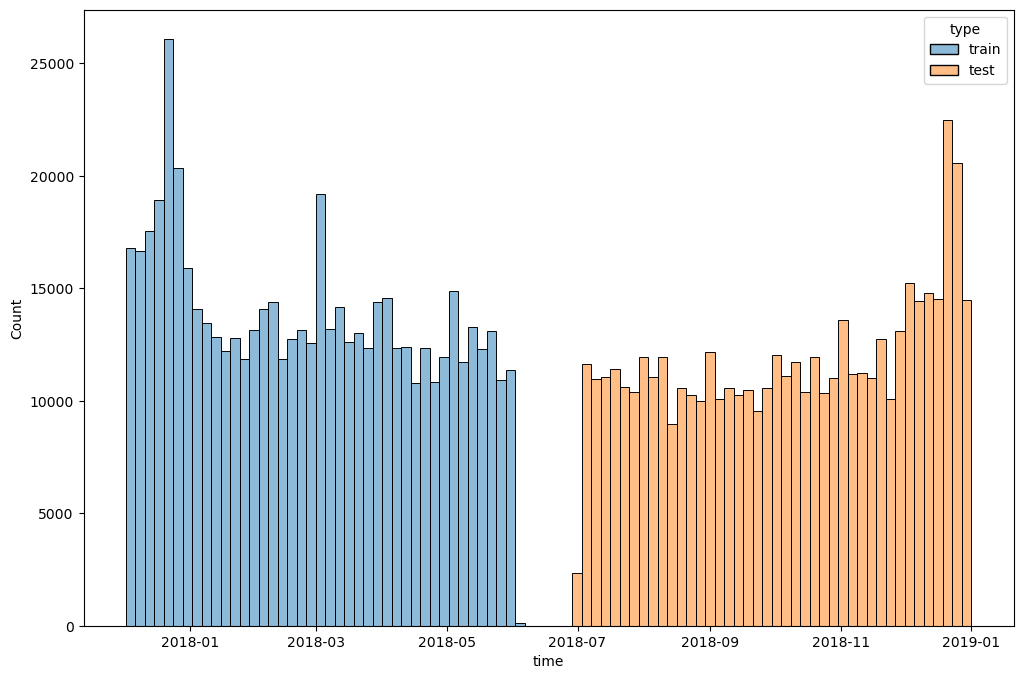

In [31]:
plt.figure(figsize=(12, 8))
sns.histplot(data=all_df.groupby(['time','type']).agg({'TransactionID': 'count'}), x='time', hue='type')

There is a gap between the train data and test data in the time variable. This could  lead to overfitting, so we will remove or convert the gap.

We also found that there are more transactions in December then other months. Therefore, we will investigate the December transaction pattern.

In [32]:
pd.set_option('display.max_row',436)

In [33]:
(all_df.isna().sum()/all_df.shape[0]).sort_values()

TransactionID     0.000000
time              0.000000
card1             0.000000
type              0.000000
TransactionAmt    0.000000
isFraud           0.000000
ProductCD         0.000000
C14               0.000003
C11               0.000003
C10               0.000003
C9                0.000003
C8                0.000003
C7                0.000003
C6                0.000003
C5                0.000003
C4                0.000003
C3                0.000003
C12               0.000003
C1                0.000003
C2                0.000003
V320              0.000014
V319              0.000014
V318              0.000014
V317              0.000014
V316              0.000014
V312              0.000014
V311              0.000014
V310              0.000014
V309              0.000014
V305              0.000014
V308              0.000014
V304              0.000014
V279              0.000014
V280              0.000014
V284              0.000014
V286              0.000014
V287              0.000014
V

In [34]:
all_df['time'] = pd.to_datetime(all_df['time'])
all_df = all_df.set_index('time')

In [35]:
all_df

TransactionID  isFraud  TransactionAmt ProductCD  card1  \
time                                                                           
2017-12-02 00:00:00        2987000        0          68.500         W  13926   
2017-12-02 00:00:01        2987001        0          29.000         W   2755   
2017-12-02 00:01:09        2987002        0          59.000         W   4663   
2017-12-02 00:01:39        2987003        0          50.000         W  18132   
2017-12-02 00:01:46        2987004        0          50.000         H   4497   
...                            ...      ...             ...       ...    ...   
2018-12-31 23:57:59        4170235       -1          94.679         C  13832   
2018-12-31 23:58:07        4170236       -1          12.173         C   3154   
2018-12-31 23:58:46        4170237       -1          49.000         W  16661   
2018-12-31 23:58:57        4170238       -1         202.000         W  16621   
2018-12-31 23:59:05        4170239       -1          24.346         C   5713   

                     card2  card3       card4  card5   card6  addr1  addr2  \
time                                                                         
2017-12-02 00:00:00    NaN  150.0    discover  142.0  credit  315.0   87.0   
2017-12-02 00:00:01  404.0  150.0  mastercard  102.0  credit  325.0   87.0   
2017-12-02 00:01:09  490.0  150.0        visa  166.0   debit  330.0   87.0   
2017-12-02 00:01:39  567.0  150.0  mastercard  117.0   debit  476.0   87.0   
2017-12-02 00:01:46  514.0  150.0  mastercard  102.0  credit  420.0   87.0   
...                    ...    ...         ...    ...     ...    ...    ...   
2018-12-31 23:57:59  375.0  185.0  mastercard  224.0   debit  284.0   60.0   
2018-12-31 23:58:07  408.0  185.0  mastercard  224.0   debit    NaN    NaN   
2018-12-31 23:58:46  490.0  150.0        visa  226.0   debit  327.0   87.0   
2018-12-31 23:58:57  516.0  150.0  mastercard  224.0   debit  177.0   87.0   
2018-12-31 23:59:05  168.0  144.0        visa  147.0  credit    NaN    NaN   

                     dist1  dist2 P_emaildomain R_emaildomain   C1   C2   C3  \
time                                                                           
2017-12-02 00:00:00   19.0    NaN           NaN           NaN  1.0  1.0  0.0   
2017-12-02 00:00:01    NaN    NaN     gmail.com           NaN  1.0  1.0  0.0   
2017-12-02 00:01:09  287.0    NaN   outlook.com           NaN  1.0  1.0  0.0   
2017-12-02 00:01:39    NaN    NaN     yahoo.com           NaN  2.0  5.0  0.0   
2017-12-02 00:01:46    NaN    NaN     gmail.com           NaN  1.0  1.0  0.0   
...                    ...    ...           ...           ...  ...  ...  ...   
2018-12-31 23:57:59    NaN    NaN     gmail.com     gmail.com  1.0  1.0  0.0   
2018-12-31 23:58:07    NaN  157.0   hotmail.com   hotmail.com  1.0  3.0  0.0   
2018-12-31 23:58:46    NaN    NaN   hotmail.com           NaN  1.0  1.0  0.0   
2018-12-31 23:58:57    NaN    NaN   hotmail.com           NaN  1.0  1.0  0.0   
2018-12-31 23:59:05    NaN    NaN   hotmail.com   hotmail.com  1.0  1.0  0.0   

                      C4   C5   C6   C7   C8   C9  C10  C11  C12   C13  C14  \
time                                                                          
2017-12-02 00:00:00  0.0  0.0  1.0  0.0  0.0  1.0  0.0  2.0  0.0   1.0  1.0   
2017-12-02 00:00:01  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   1.0  1.0   
2017-12-02 00:01:09  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0   1.0  1.0   
2017-12-02 00:01:39  0.0  0.0  4.0  0.0  0.0  1.0  0.0  1.0  0.0  25.0  1.0   
2017-12-02 00:01:46  0.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0   1.0  1.0   
...                  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...   
2018-12-31 23:57:59  1.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0   1.0  1.0   
2018-12-31 23:58:07  1.0  0.0  1.0  1.0  2.0  0.0  2.0  1.0  1.0   3.0  1.0   
2018-12-31 23:58:46  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0   1.0  1.0   
2018-12-31 23:58:57  0.0  0.0  1.0  0.0  0.0  1.0  0.0 

In [36]:
def missing_values(df):
    shape_init=df.shape[1]
    for col in df.columns:
        if round(df[col].isna().sum()/df.shape[0]*100, 2) > 90:
            df.drop(columns=[col], inplace=True)
            if col in int_col:
                num_col.remove(col)
            elif col in object_col:
                object_col.remove(col)
            elif col in float_col:
                float_col.remove(col)
    print(f"Nombre de variables supprimées : {shape_init-df.shape[1]}")
    print(f"Variables catégoriques restantes : {len(object_col)}")     
    print(f"Variables entiéres restantes : {len(int_col)}")
    print(f"Variables réelles restantes : {len(float_col)}")

In [37]:
missing_values(all_df)

Nombre de variables supprimées : 21
Variables catégoriques restantes : 26
Variables entiéres restantes : 3
Variables réelles restantes : 383


In [38]:
all_df.shape

(1097231, 413)

In [39]:
(all_df.isna().sum()/all_df.shape[0]).sort_values()

TransactionID     0.000000
card1             0.000000
ProductCD         0.000000
type              0.000000
isFraud           0.000000
TransactionAmt    0.000000
C14               0.000003
C11               0.000003
C10               0.000003
C9                0.000003
C8                0.000003
C7                0.000003
C6                0.000003
C5                0.000003
C4                0.000003
C3                0.000003
C12               0.000003
C1                0.000003
C2                0.000003
V321              0.000014
V320              0.000014
V279              0.000014
V280              0.000014
V284              0.000014
V285              0.000014
V286              0.000014
V287              0.000014
V290              0.000014
V291              0.000014
V292              0.000014
V293              0.000014
V294              0.000014
V295              0.000014
V297              0.000014
V299              0.000014
V302              0.000014
V303              0.000014
V

In [40]:
int_col=all_df.dtypes[all_df.dtypes=='int64'].index
print(int_col)

Index(['TransactionID', 'isFraud', 'card1'], dtype='object')


In [41]:
int_col=list(int_col).remove('isFraud')

In [42]:
float_col=all_df.dtypes[all_df.dtypes=='float64'].index
print(float_col)

Index(['TransactionAmt', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1',
       'C1', 'C2', 'C3',
       ...
       'V339', 'id_01', 'id_02', 'id_05', 'id_06', 'id_11', 'id_13', 'id_17',
       'id_19', 'id_20'],
      dtype='object', length=383)


In [43]:
object_col=all_df.dtypes[all_df.dtypes==object].index
print(object_col)

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_28', 'id_29', 'id_31', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo', 'type'],
      dtype='object')


In [44]:
all_df['isFraud'].value_counts(normalize=True)

 0    0.519377
-1    0.461791
 1    0.018832
Name: isFraud, dtype: float64

we have almost 47% of undetermined transactions wether fraudulent or not , almost 2% fraudulent transactions and 52% normal transactions . it confirms well the unbalanced data state

In [45]:
float_col=list(float_col)

C:\Users\MSI\AppData\Local\Temp\ipykernel_13404\2160106263.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_df[col])
C:\Users\MSI\AppData\Local\Temp\ipykernel_13404\2160106263.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_df[col])
C:\Users\MSI\AppData\Local\Temp\ipykernel_13404\

KeyboardInterrupt: 

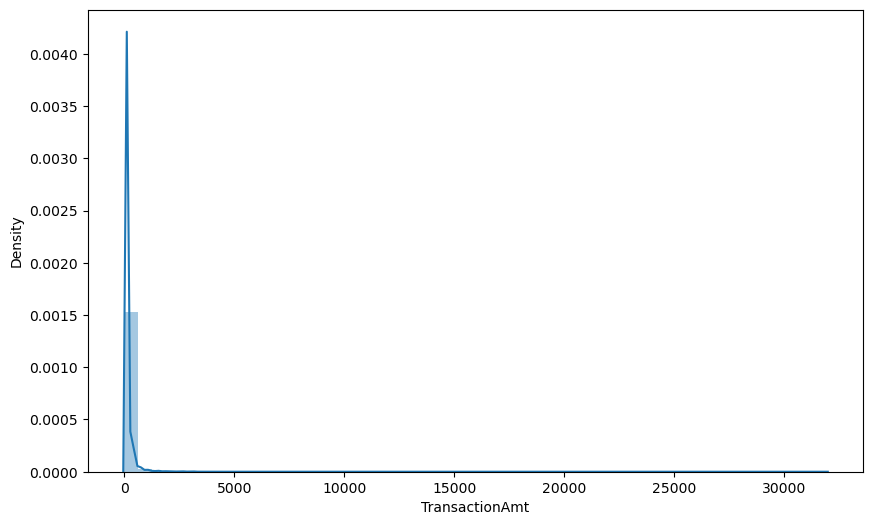

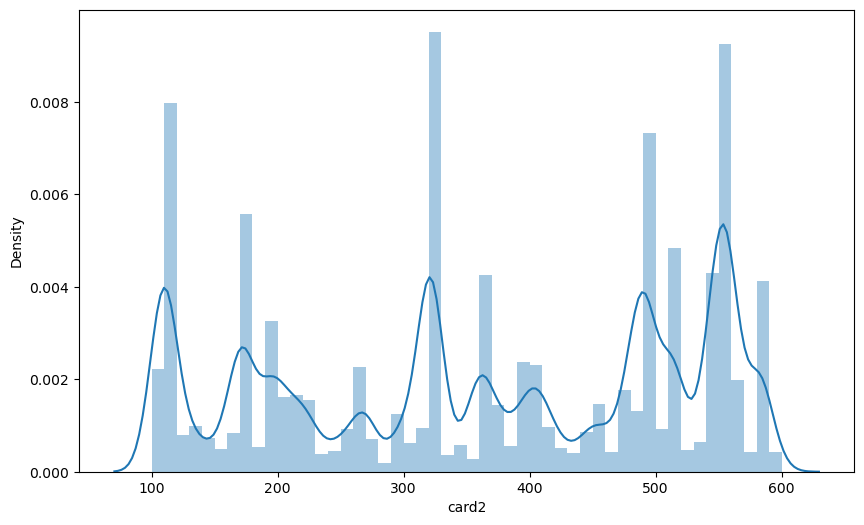

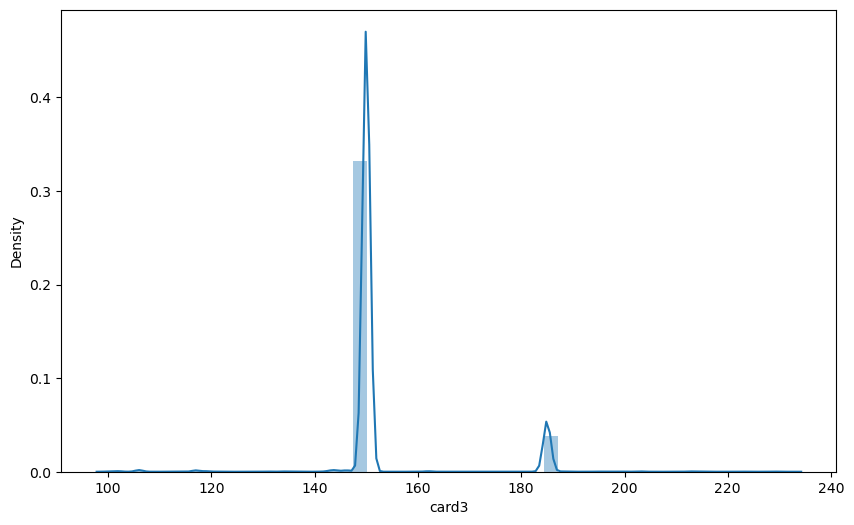

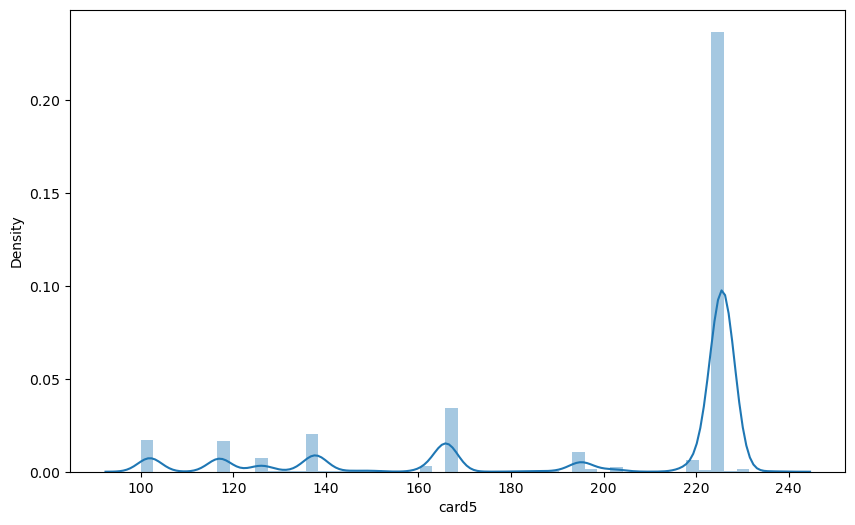

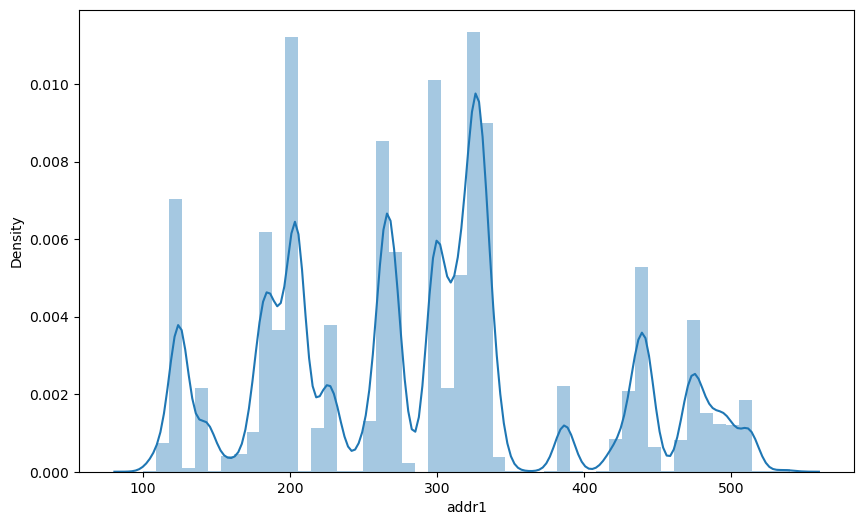

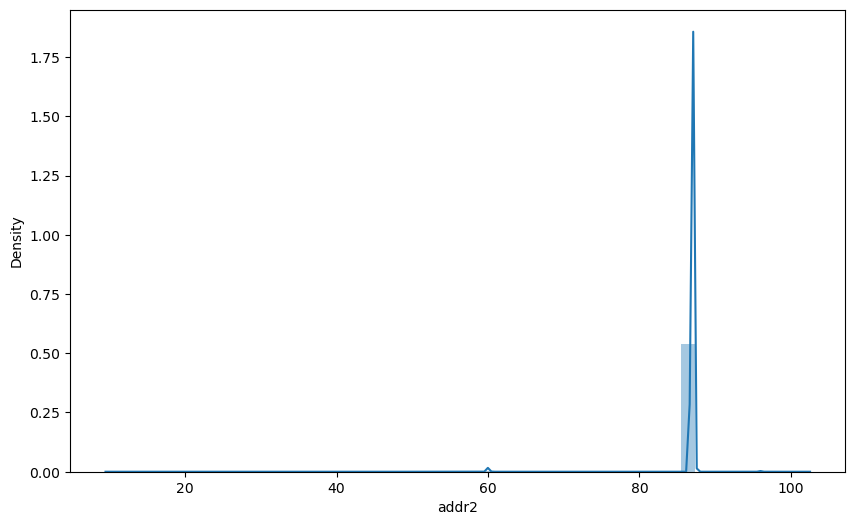

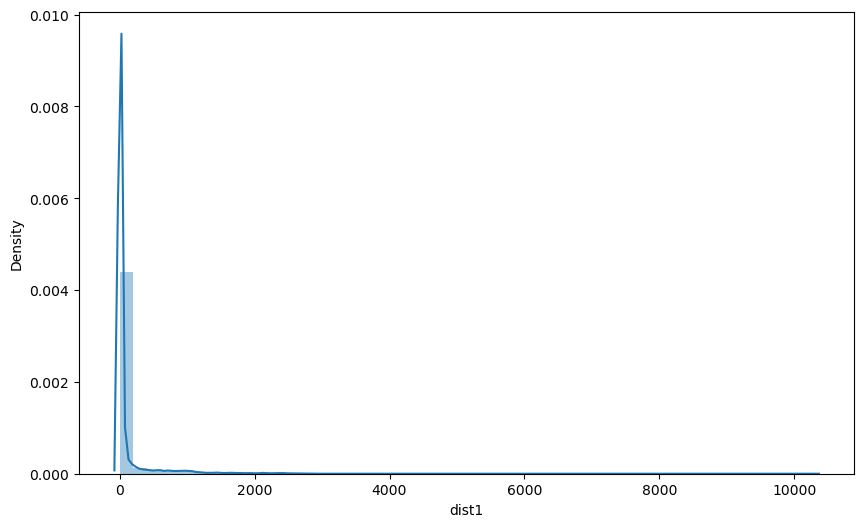

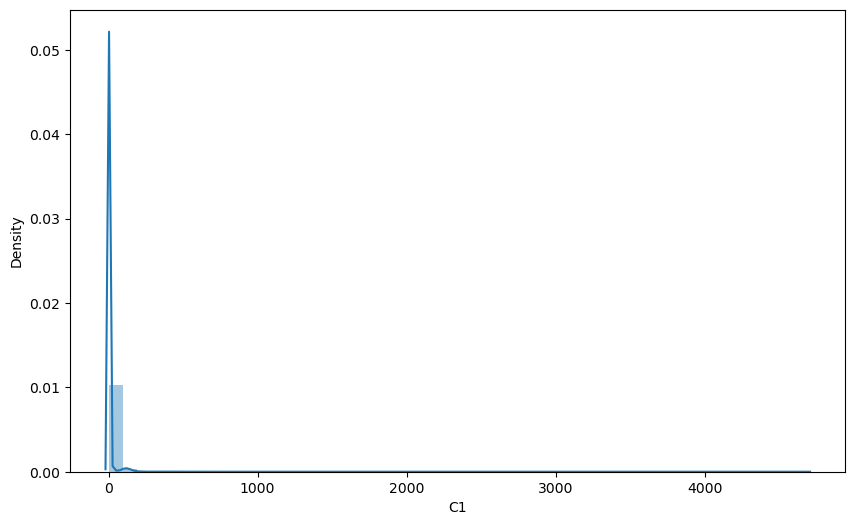

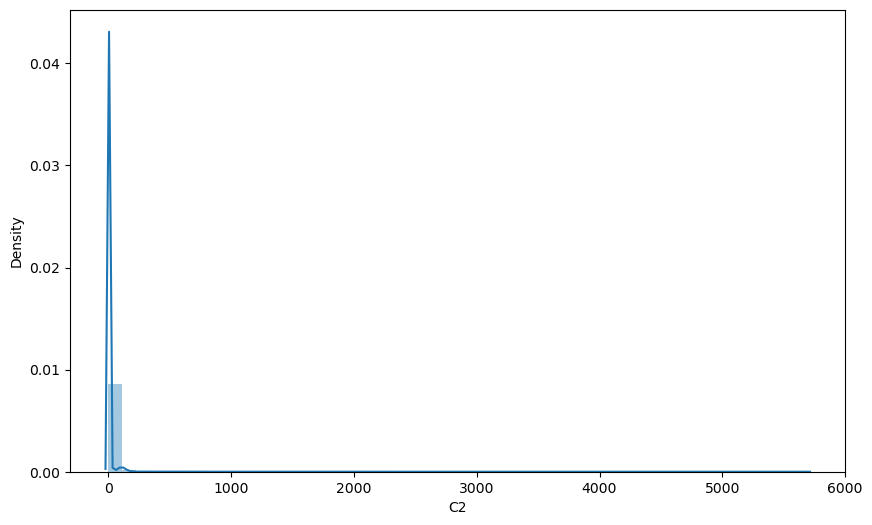

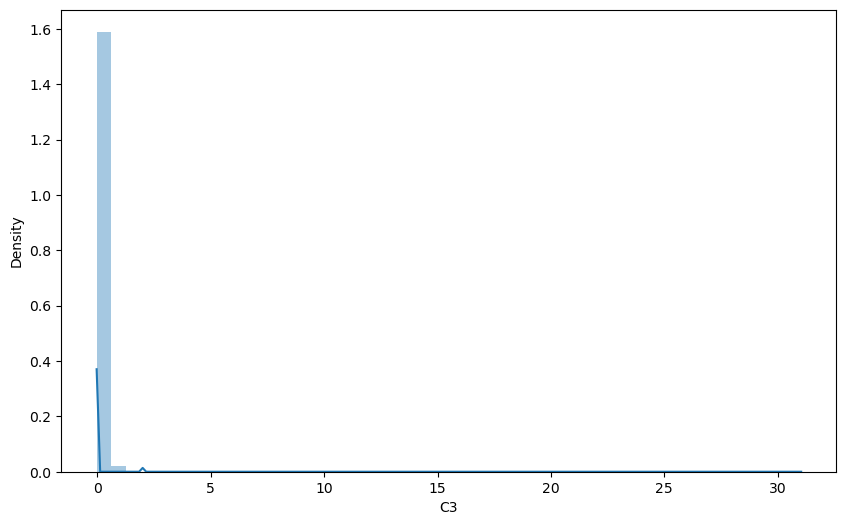

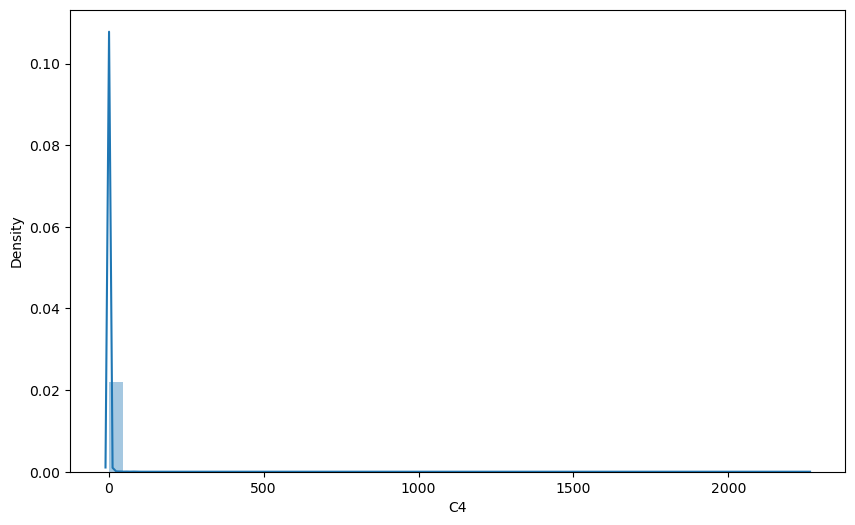

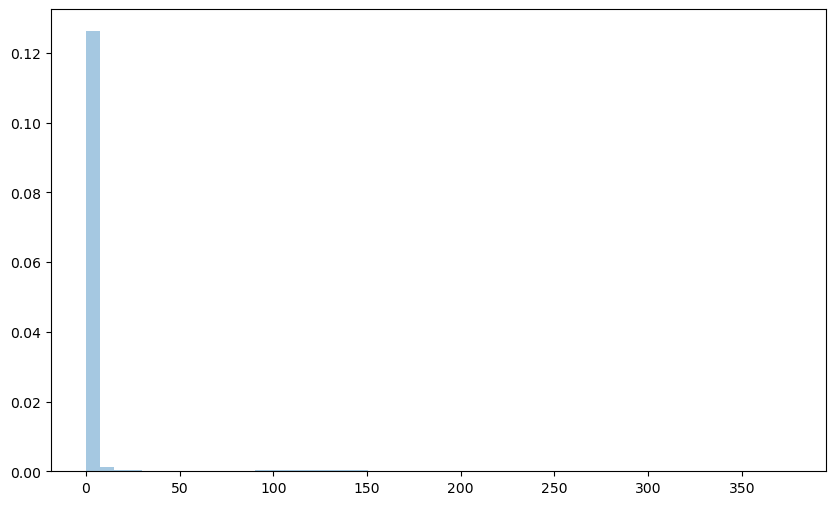

In [46]:
for col in float_col:
    plt.figure(figsize=(10,6))
    sns.distplot(all_df[col])

In [47]:
target=all_df['isFraud']

In [48]:
target

time
2017-12-02 00:00:00    0
2017-12-02 00:00:01    0
2017-12-02 00:01:09    0
2017-12-02 00:01:39    0
2017-12-02 00:01:46    0
                      ..
2018-12-31 23:57:59   -1
2018-12-31 23:58:07   -1
2018-12-31 23:58:46   -1
2018-12-31 23:58:57   -1
2018-12-31 23:59:05   -1
Name: isFraud, Length: 1097231, dtype: int64

In [49]:
all_df.drop(columns='TransactionID',inplace=True)

In [50]:
all_df

isFraud  TransactionAmt ProductCD  card1  card2  card3  \
time                                                                          
2017-12-02 00:00:00        0          68.500         W  13926    NaN  150.0   
2017-12-02 00:00:01        0          29.000         W   2755  404.0  150.0   
2017-12-02 00:01:09        0          59.000         W   4663  490.0  150.0   
2017-12-02 00:01:39        0          50.000         W  18132  567.0  150.0   
2017-12-02 00:01:46        0          50.000         H   4497  514.0  150.0   
...                      ...             ...       ...    ...    ...    ...   
2018-12-31 23:57:59       -1          94.679         C  13832  375.0  185.0   
2018-12-31 23:58:07       -1          12.173         C   3154  408.0  185.0   
2018-12-31 23:58:46       -1          49.000         W  16661  490.0  150.0   
2018-12-31 23:58:57       -1         202.000         W  16621  516.0  150.0   
2018-12-31 23:59:05       -1          24.346         C   5713  168.0  144.0   

                          card4  card5   card6  addr1  addr2  dist1  \
time                                                                  
2017-12-02 00:00:00    discover  142.0  credit  315.0   87.0   19.0   
2017-12-02 00:00:01  mastercard  102.0  credit  325.0   87.0    NaN   
2017-12-02 00:01:09        visa  166.0   debit  330.0   87.0  287.0   
2017-12-02 00:01:39  mastercard  117.0   debit  476.0   87.0    NaN   
2017-12-02 00:01:46  mastercard  102.0  credit  420.0   87.0    NaN   
...                         ...    ...     ...    ...    ...    ...   
2018-12-31 23:57:59  mastercard  224.0   debit  284.0   60.0    NaN   
2018-12-31 23:58:07  mastercard  224.0   debit    NaN    NaN    NaN   
2018-12-31 23:58:46        visa  226.0   debit  327.0   87.0    NaN   
2018-12-31 23:58:57  mastercard  224.0   debit  177.0   87.0    NaN   
2018-12-31 23:59:05        visa  147.0  credit    NaN    NaN    NaN   

                    P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6  \
time                                                                            
2017-12-02 00:00:00           NaN           NaN  1.0  1.0  0.0  0.0  0.0  1.0   
2017-12-02 00:00:01     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0   
2017-12-02 00:01:09   outlook.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0   
2017-12-02 00:01:39     yahoo.com           NaN  2.0  5.0  0.0  0.0  0.0  4.0   
2017-12-02 00:01:46     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0   
...                           ...           ...  ...  ...  ...  ...  ...  ...   
2018-12-31 23:57:59     gmail.com     gmail.com  1.0  1.0  0.0  1.0  0.0  1.0   
2018-12-31 23:58:07   hotmail.com   hotmail.com  1.0  3.0  0.0  1.0  0.0  1.0   
2018-12-31 23:58:46   hotmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0   
2018-12-31 23:58:57   hotmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0   
2018-12-31 23:59:05   hotmail.com   hotmail.com  1.0  1.0  0.0  1.0  0.0  1.0   

                      C7   C8   C9  C10  C11  C12   C13  C14     D1     D2  \
time                                                                         
2017-12-02 00:00:00  0.0  0.0  1.0  0.0  2.0  0.0   1.0  1.0   14.0    NaN   
2017-12-02 00:00:01  0.0  0.0  0.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   
2017-12-02 00:01:09  0.0  0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   
2017-12-02 00:01:39  0.0  0.0  1.0  0.0  1.0  0.0  25.0  1.0  112.0  112.0   
2017-12-02 00:01:46  0.0  1.0  0.0  1.0  1.0  0.0   1.0  1.0    0.0    NaN   
...                  ...  ...  ...  ...  ...  ...   ...  ...    ...    ...   
2018-12-31 23:57:59  1.0  0.0  0.0  0.0  1.0  1.0   1.0  1.0    0.0    NaN   
2018-12-31 23:58:07  1.0  2.0  0.0  2.0  1.0  1.0   3.0  1.0   16.0   16.0   
2018-12-31 23:58:46  0.0  0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   
2018-12-31 23:58:57  0.0  0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   
2018-12-31 23:59:05  1.0  1.0  0.0  1.0  1.0  1.0   1.0  1.0    0.0    NaN   



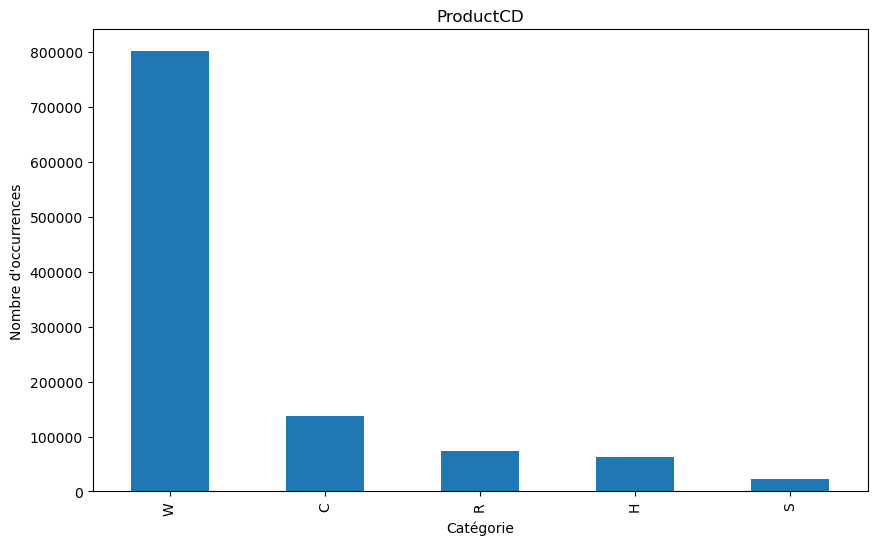

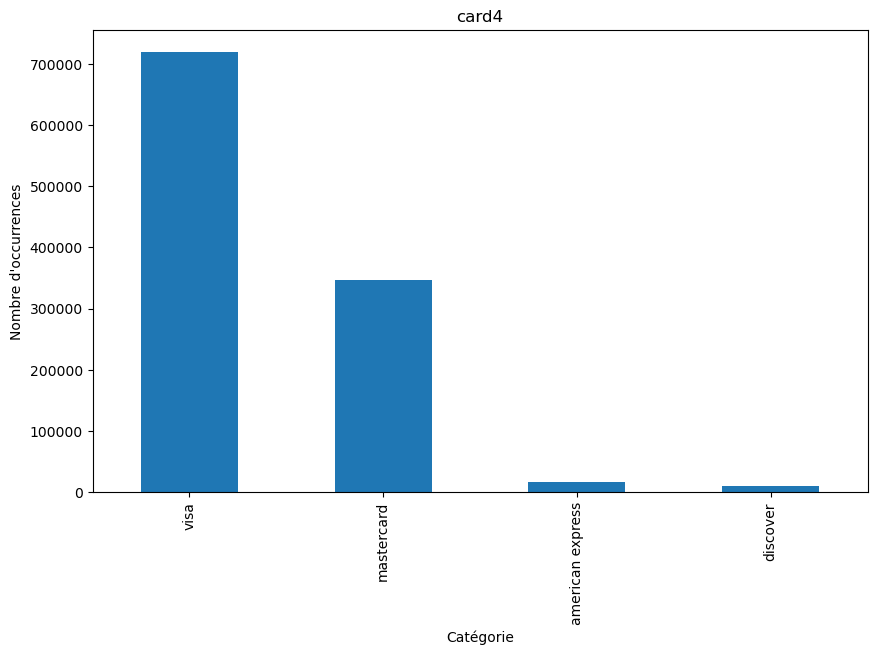

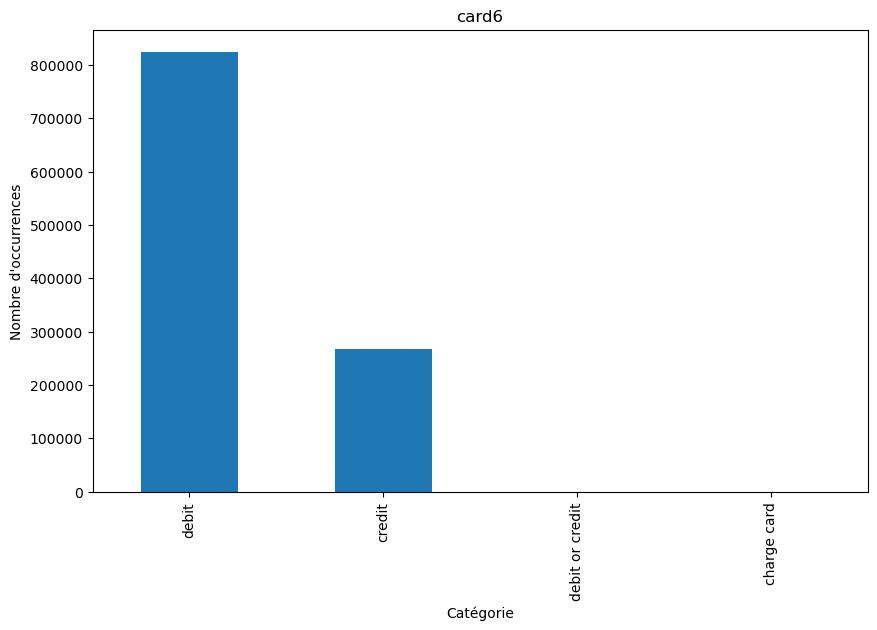

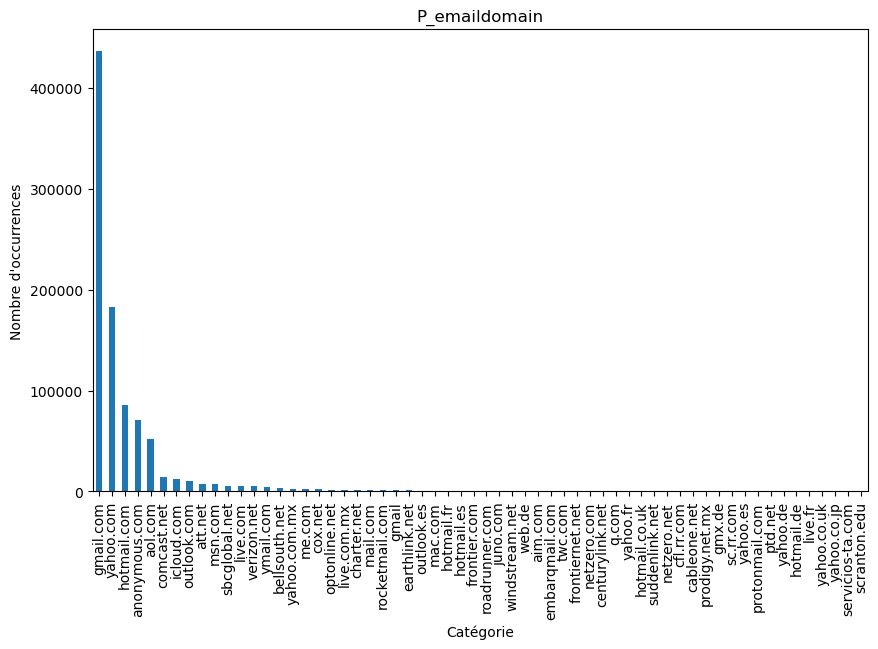

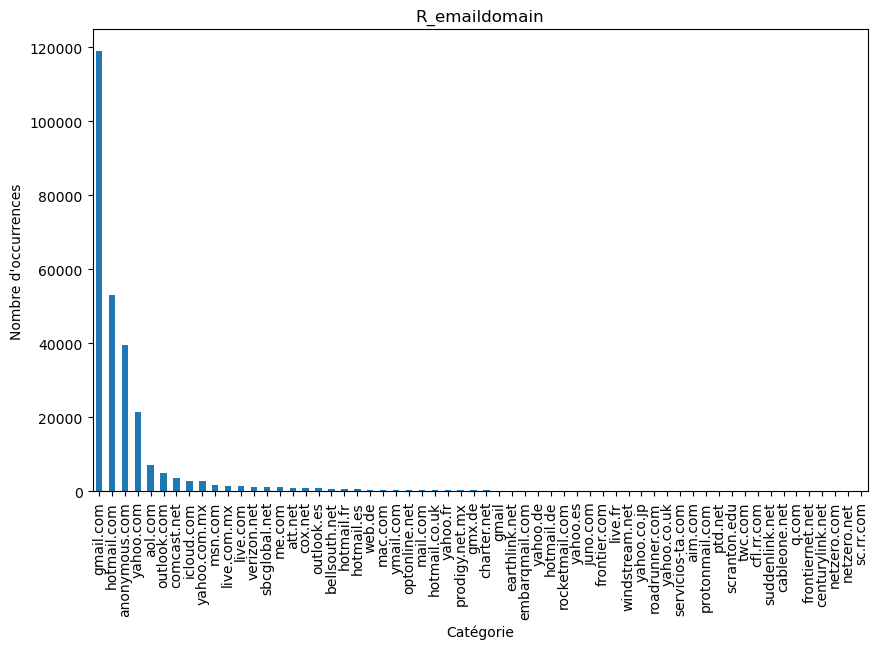

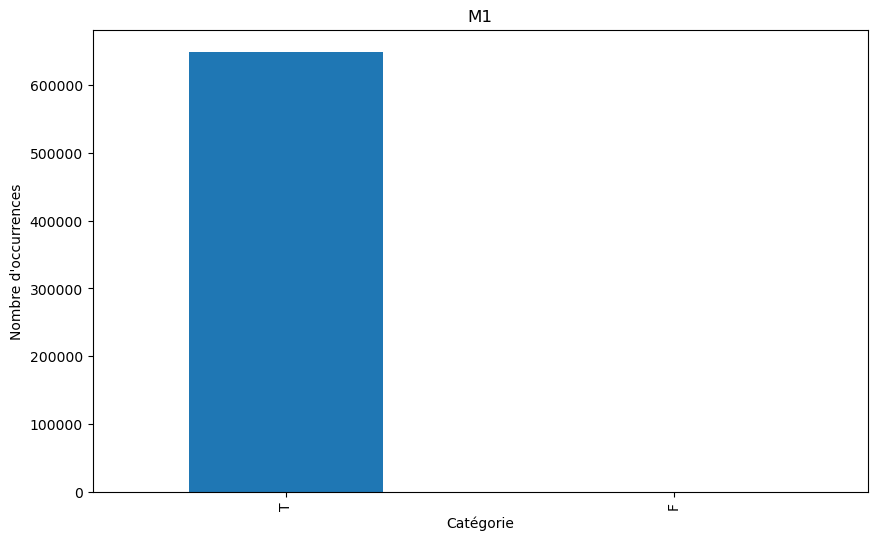

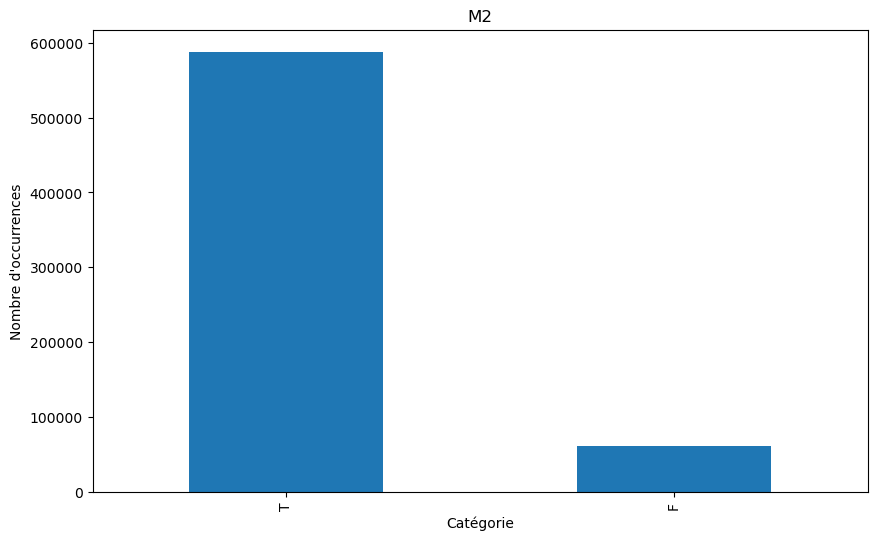

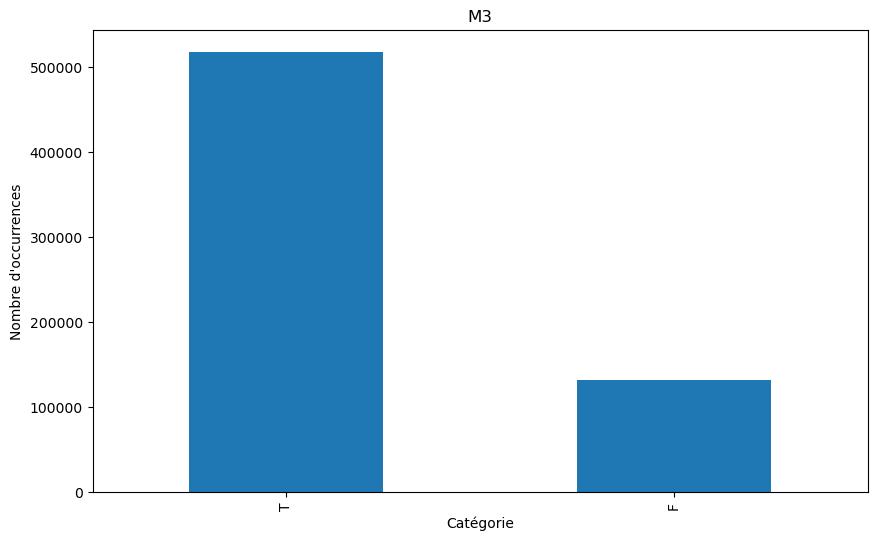

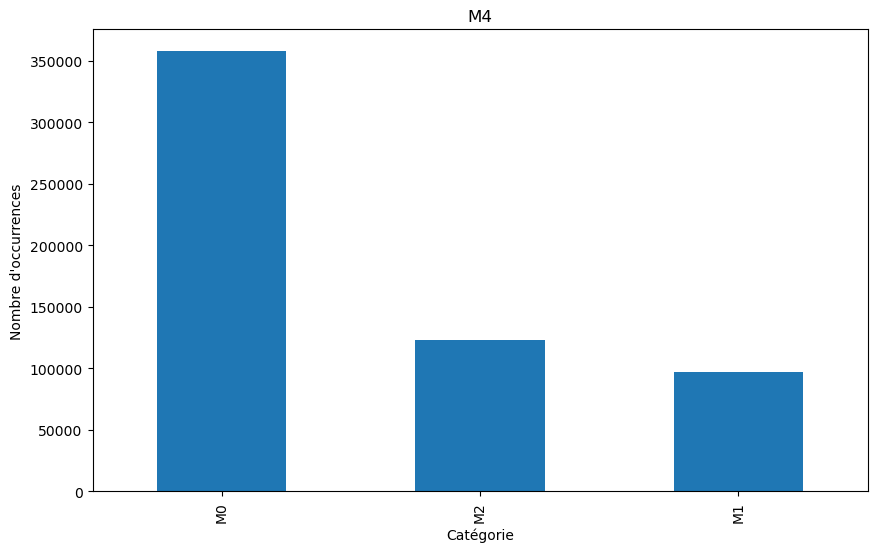

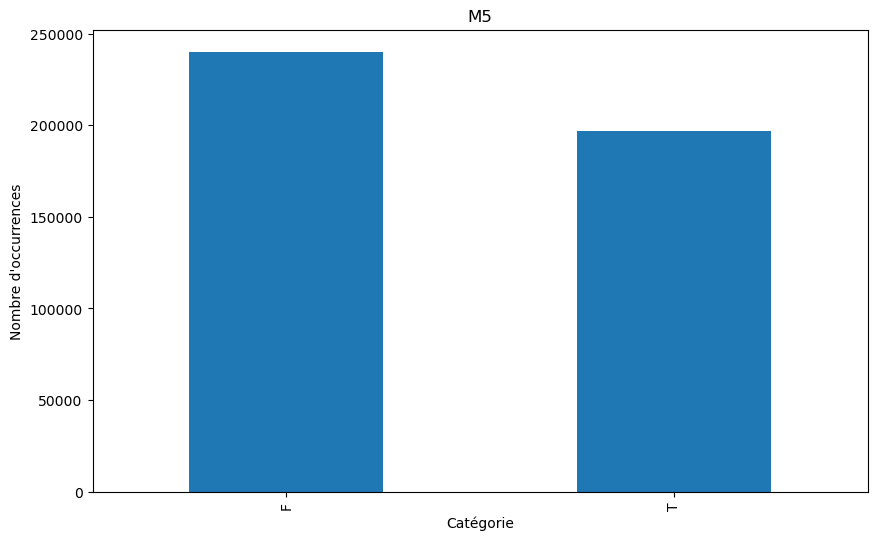

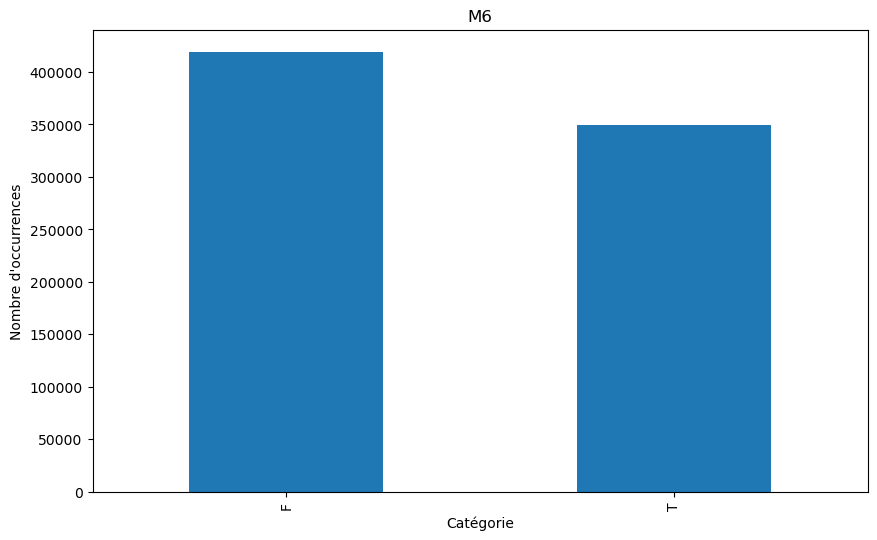

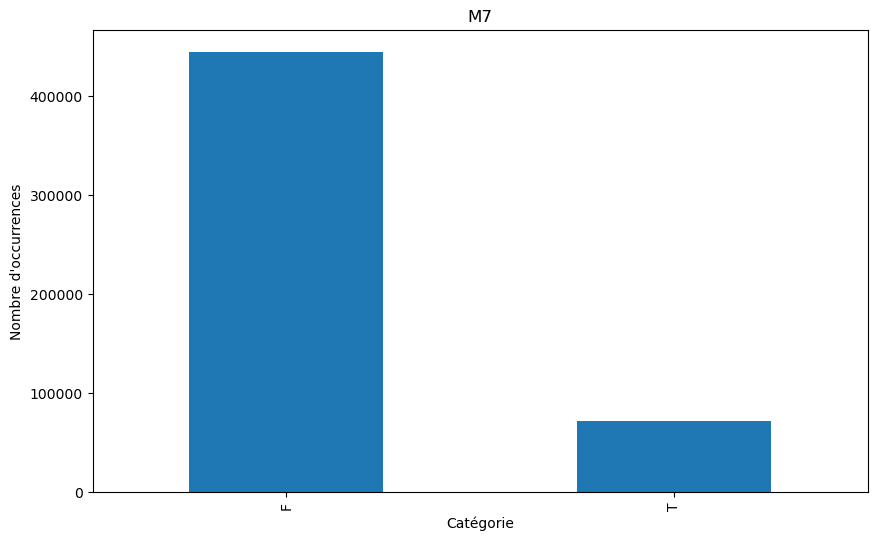

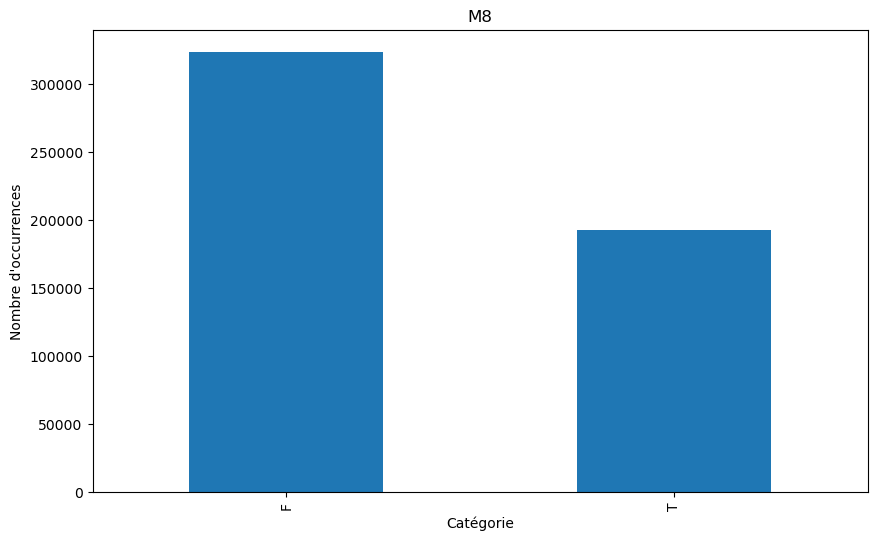

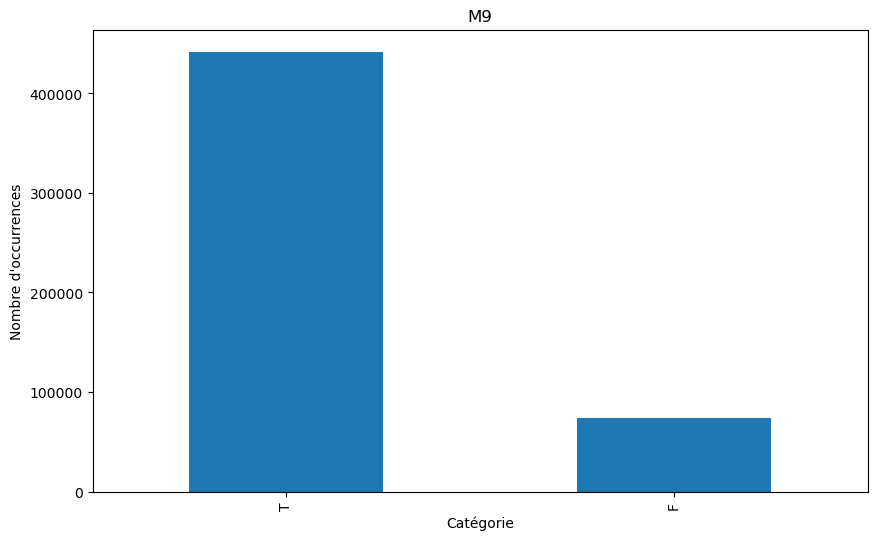

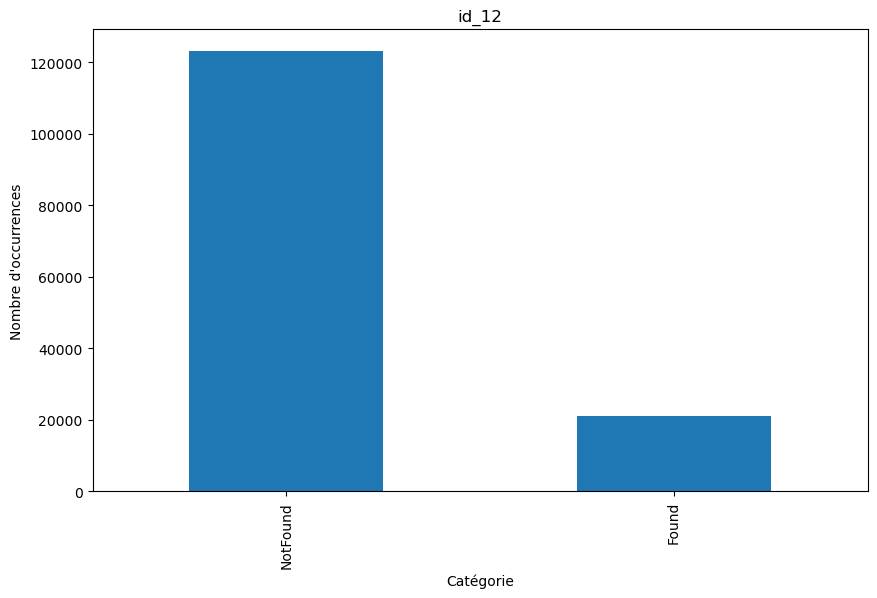

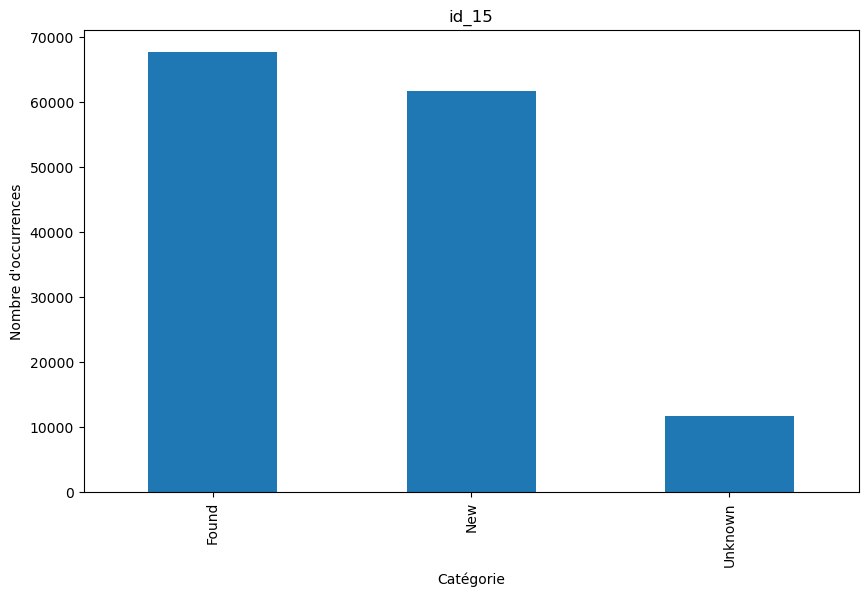

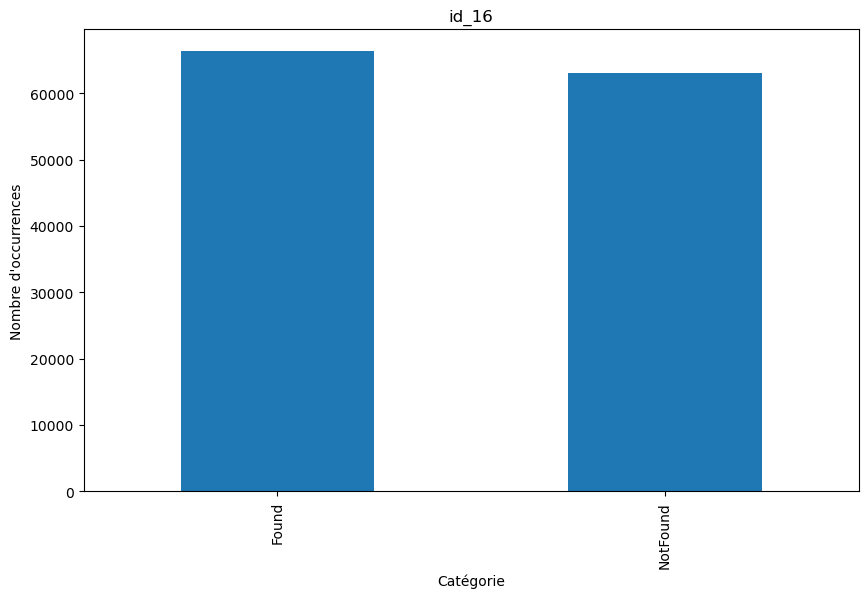

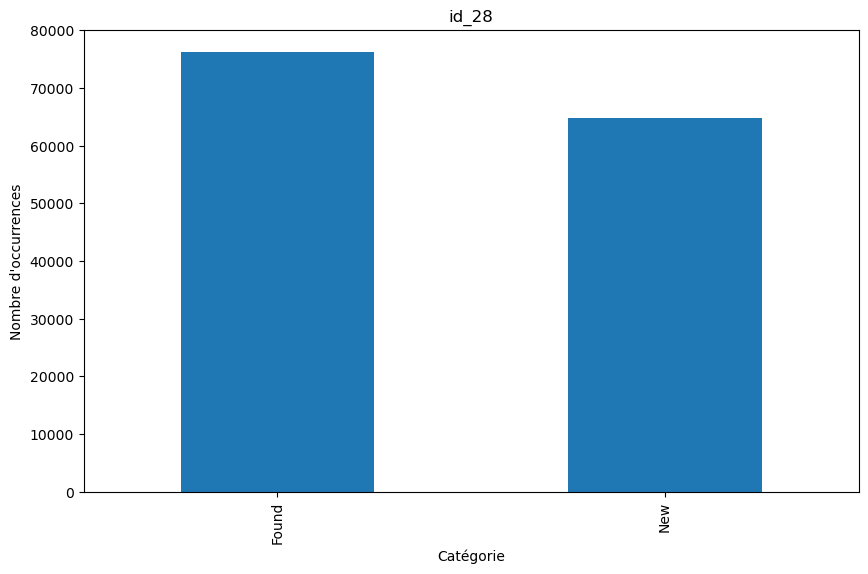

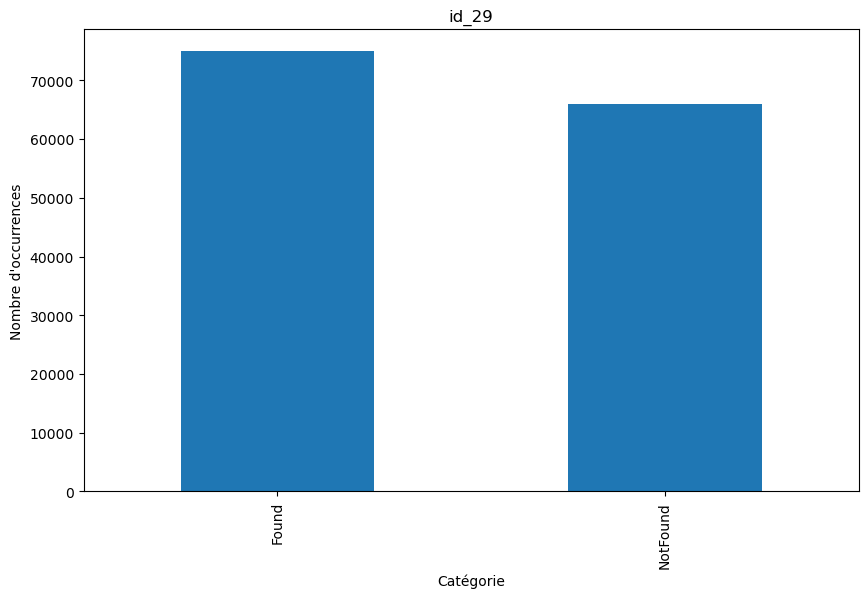

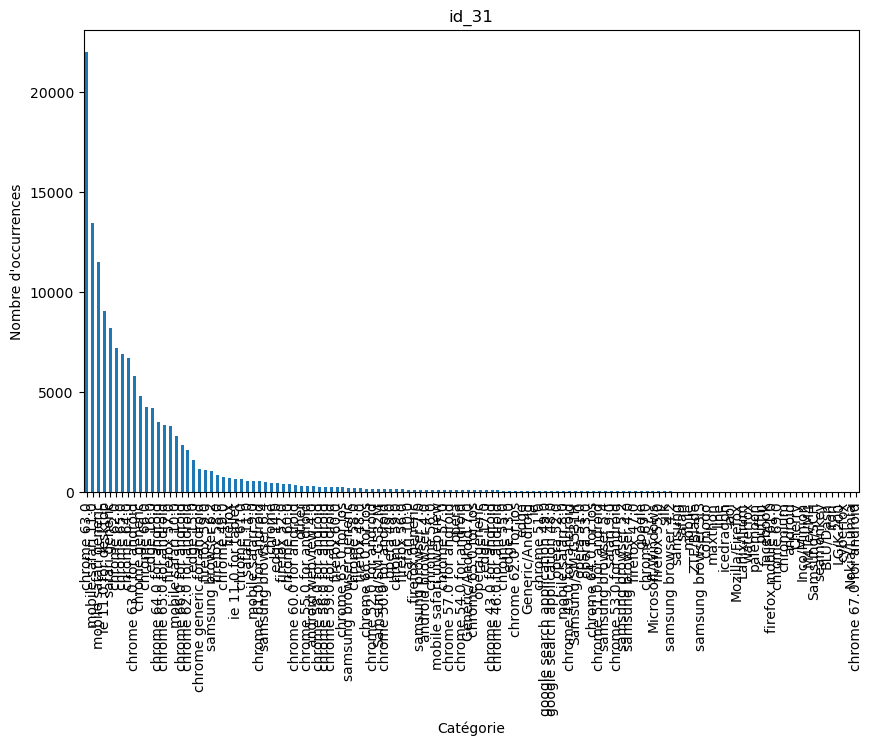

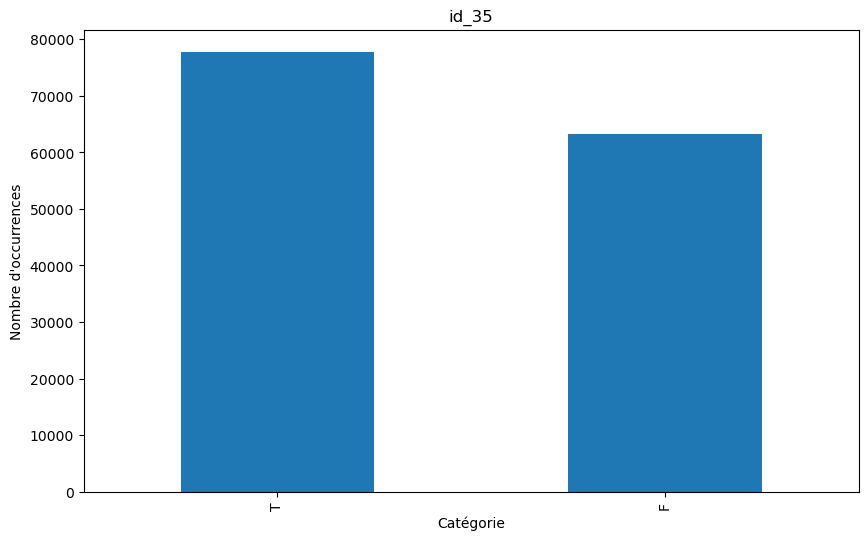

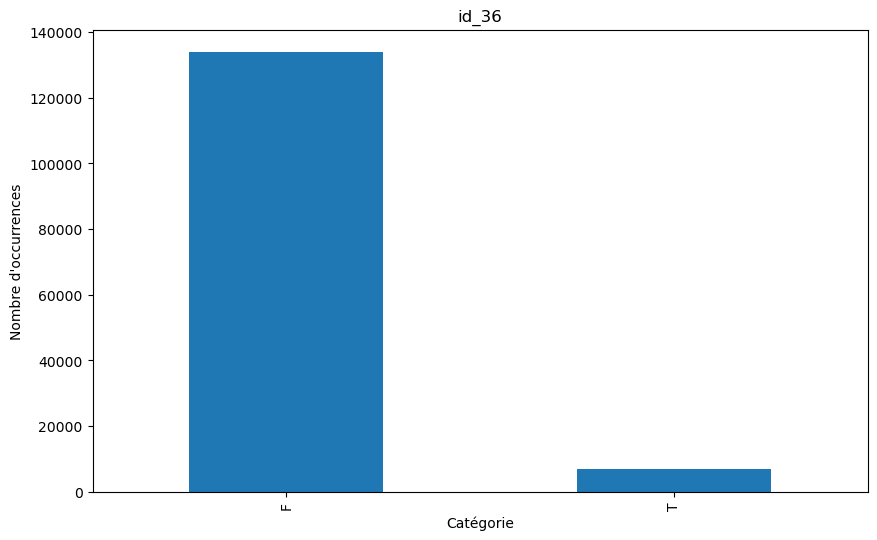

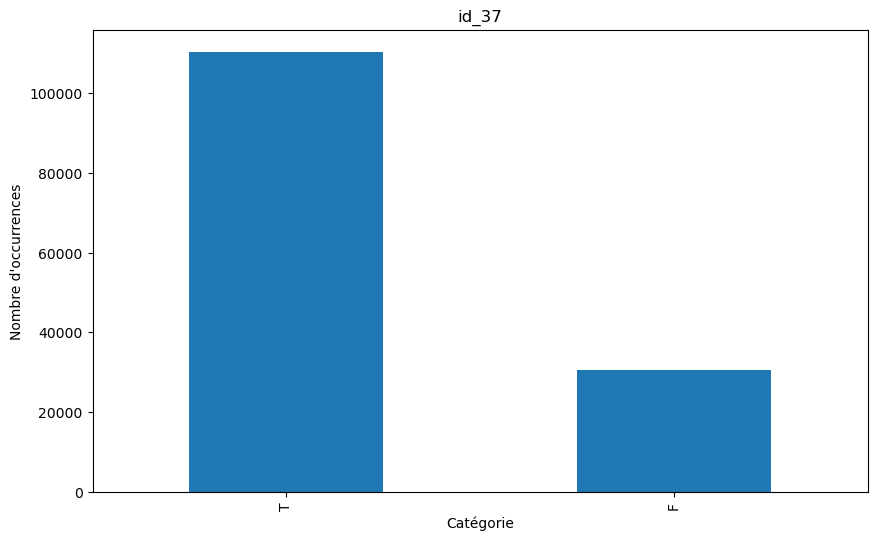

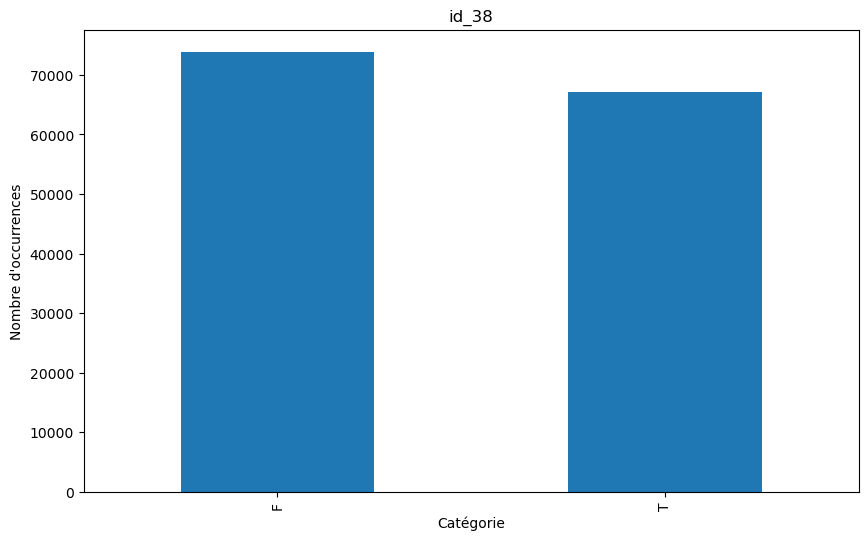

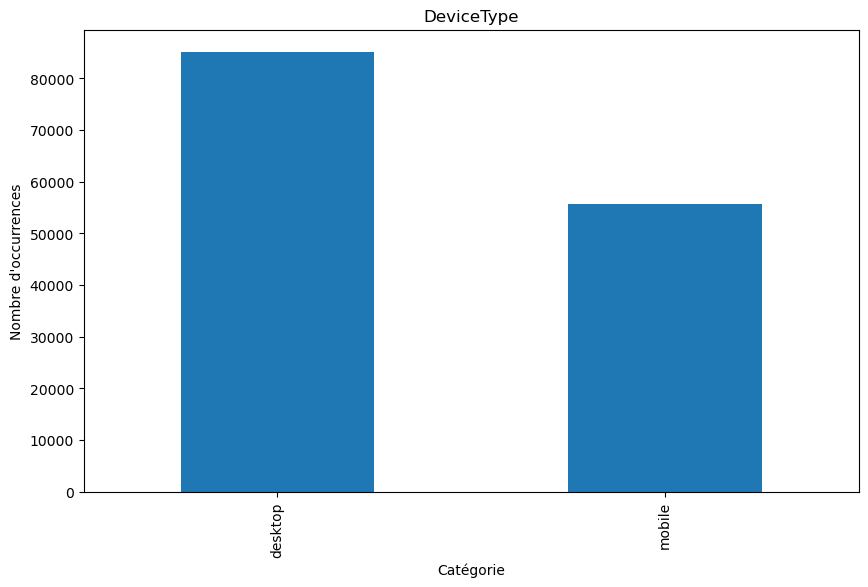

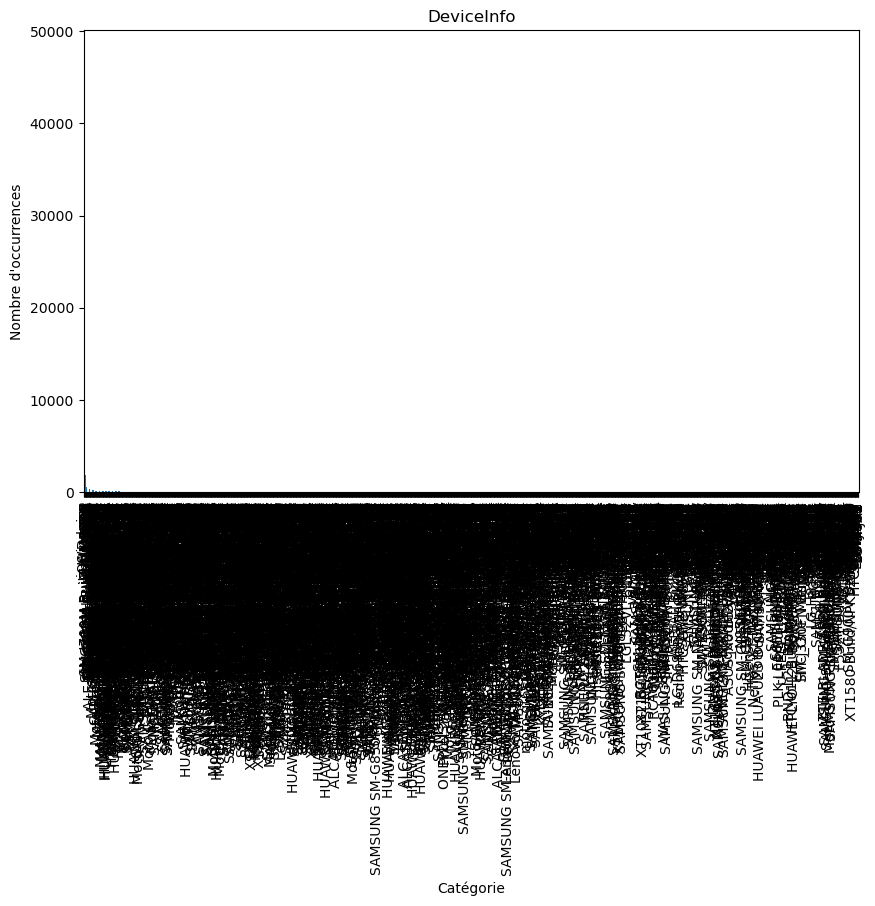

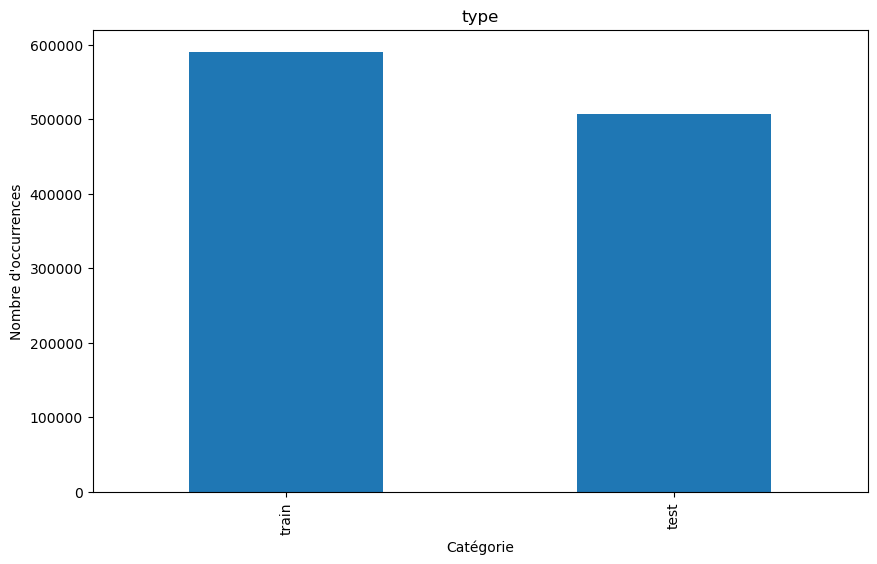

In [52]:
for col in object_col:
    plt.figure(figsize=(10,6))
    counts=all_df[col].value_counts()
    counts.plot(kind='bar')
    plt.xlabel('Catégorie')
    plt.ylabel('Nombre d\'occurrences')
    plt.title(col)
    plt.show()

In [55]:
all_df['DeviceInfo'].value_counts()

Windows        47722
iOS Device     19782
MacOS          12573
Trident/7.0     7440
rv:11.0         1901
               ...  
LGMS345            1
verykool           1
XT1072             1
LG-H931            1
0PJA2              1
Name: DeviceInfo, Length: 1786, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

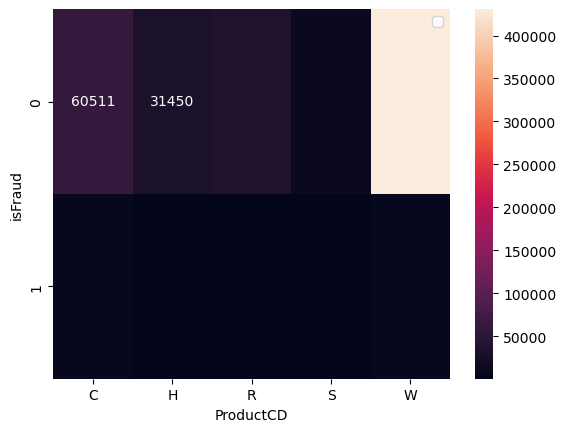

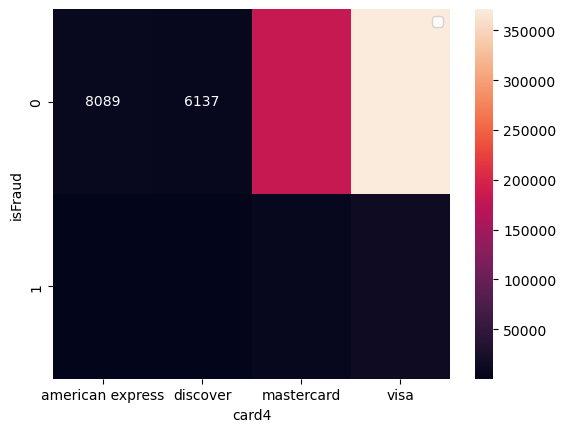

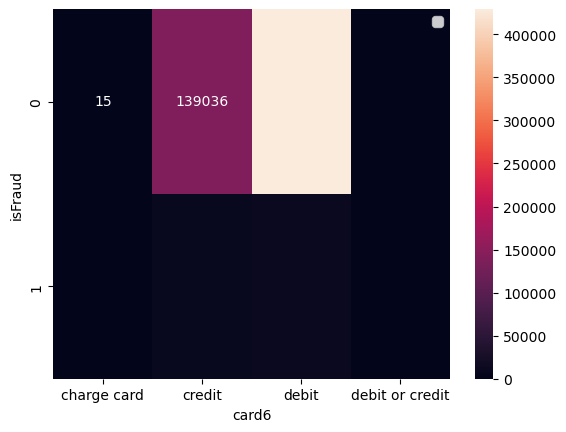

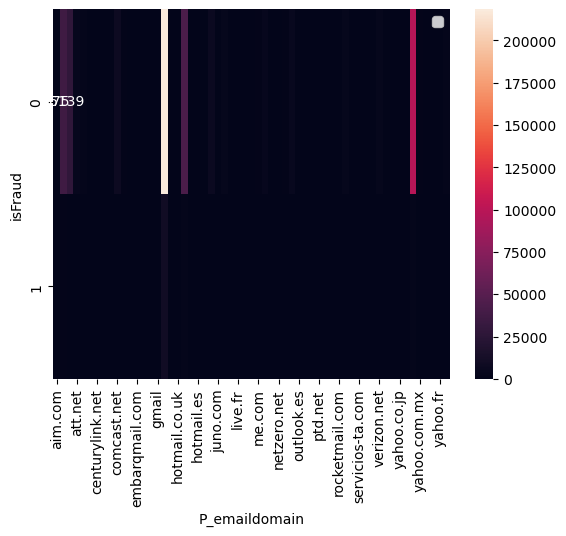

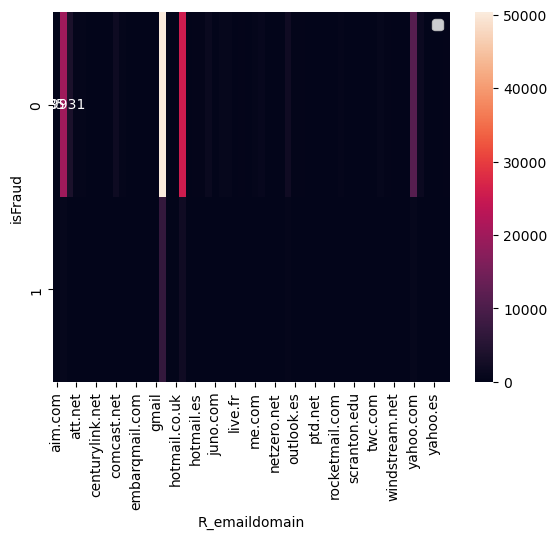

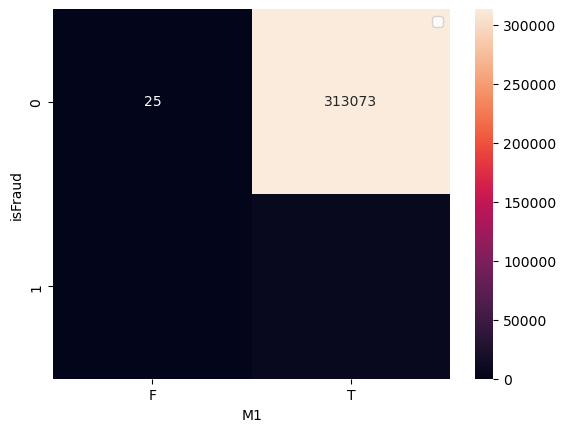

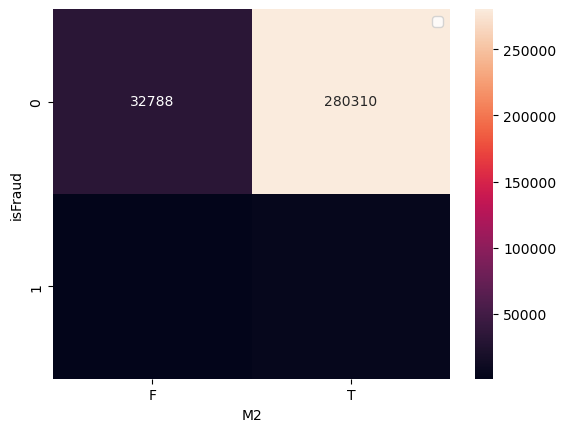

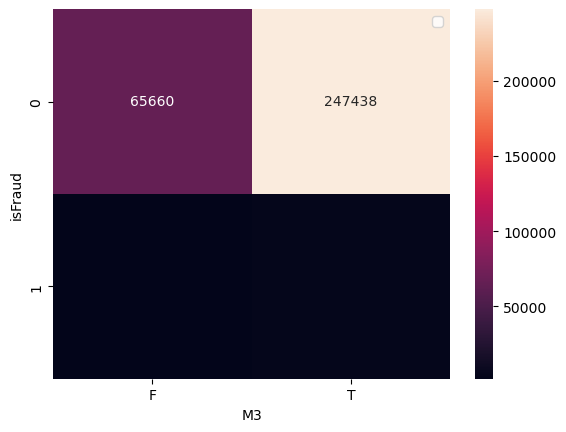

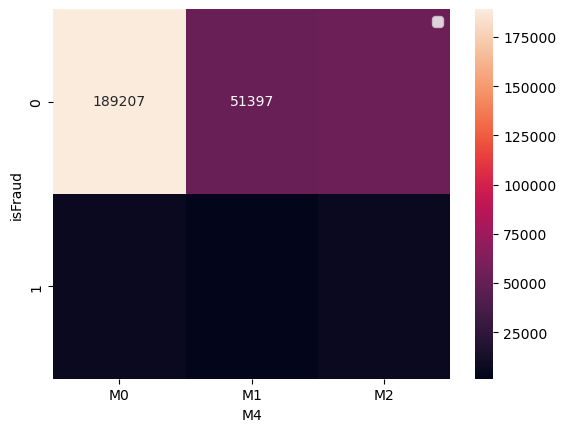

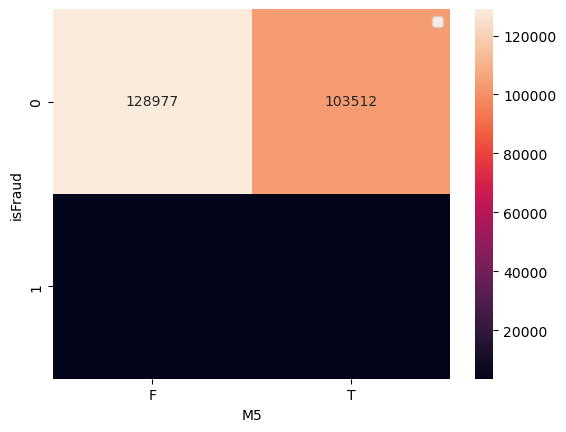

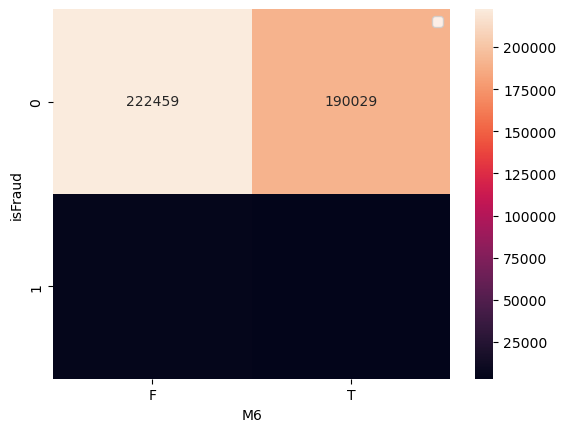

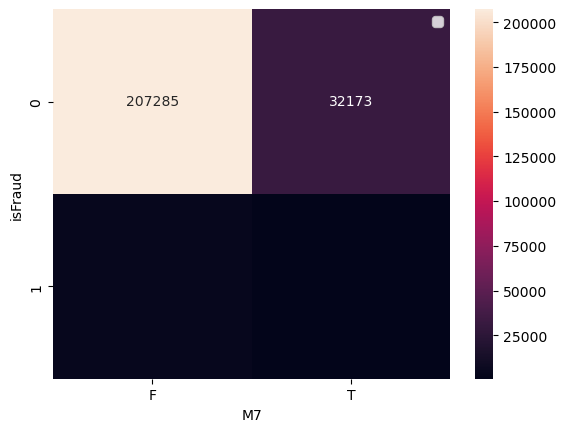

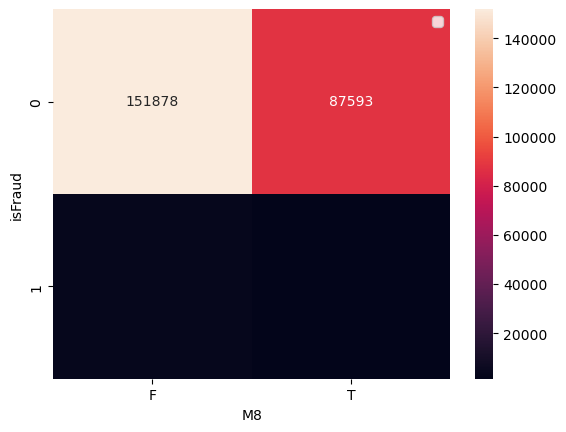

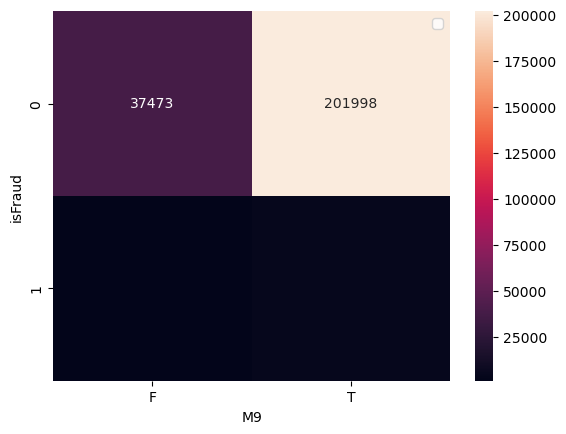

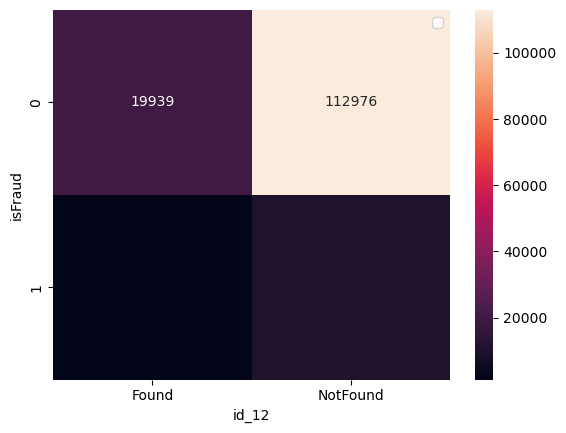

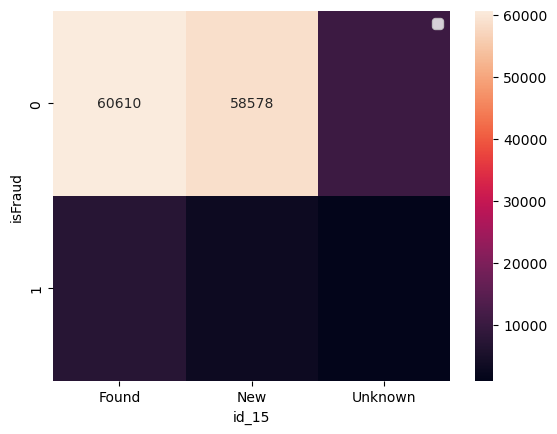

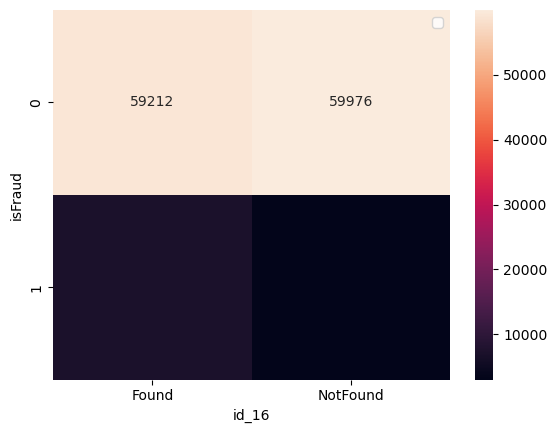

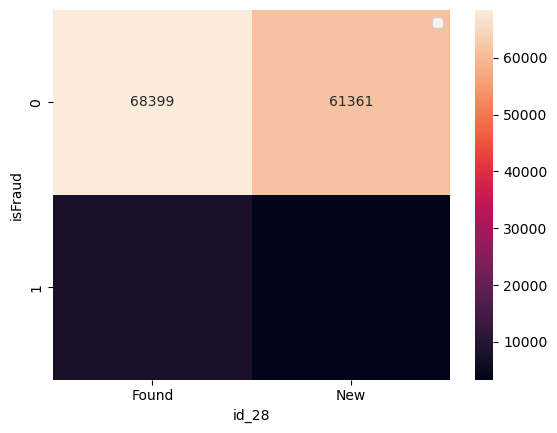

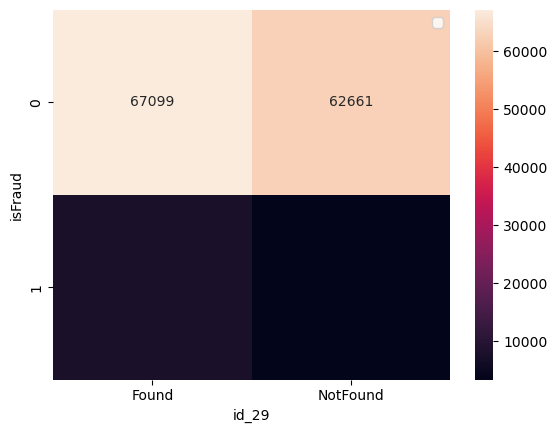

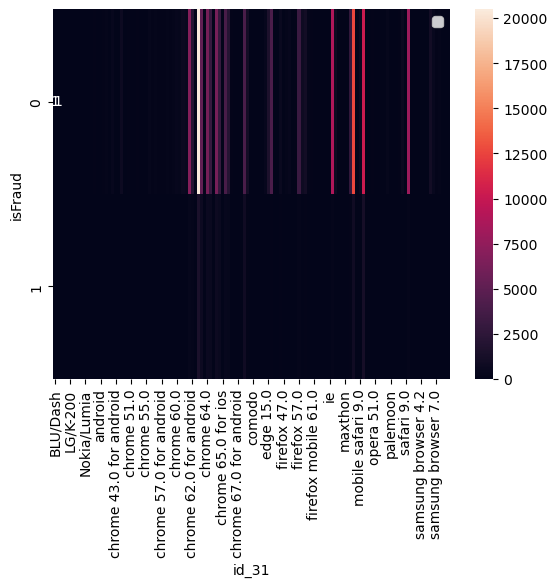

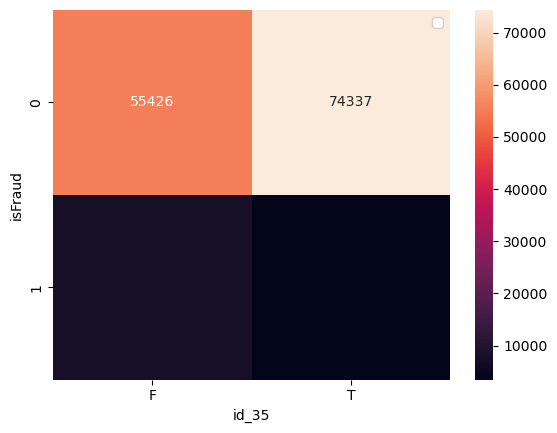

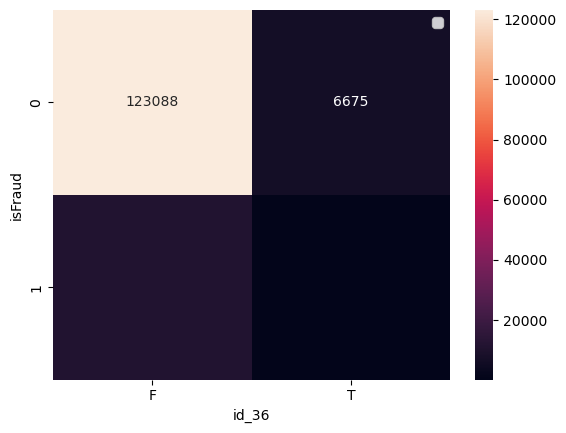

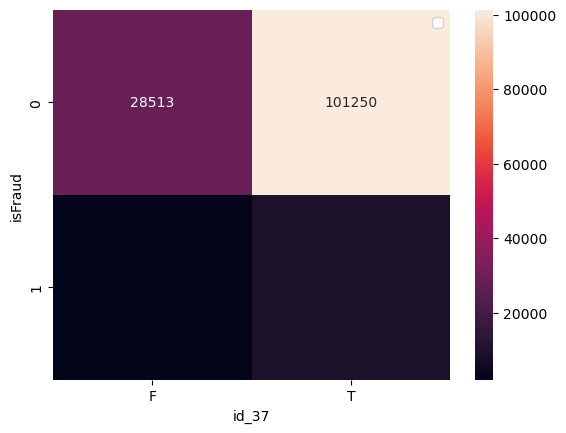

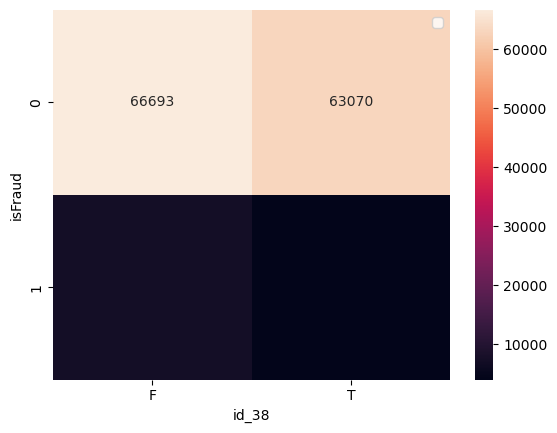

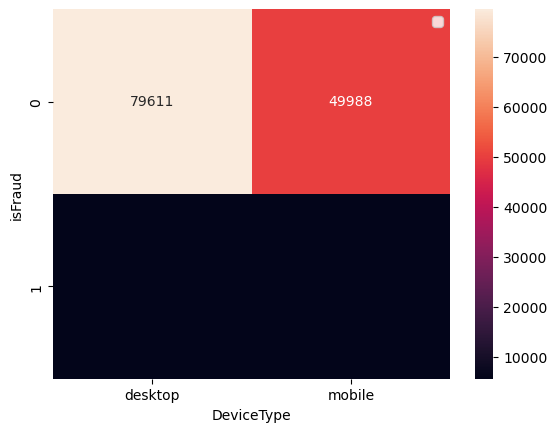

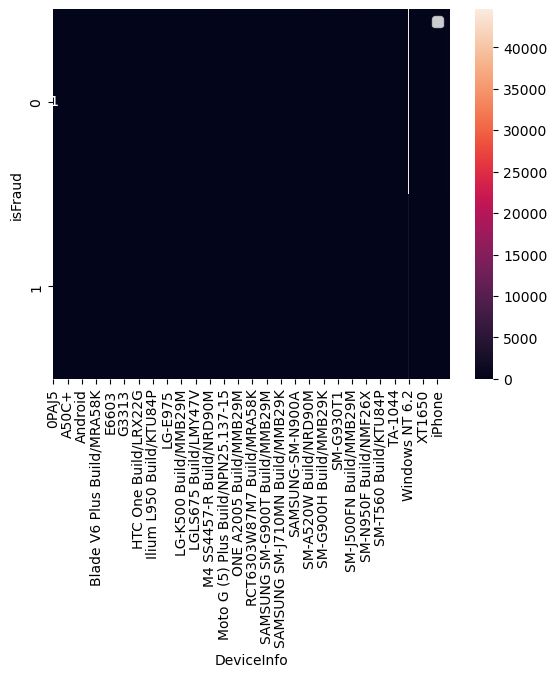

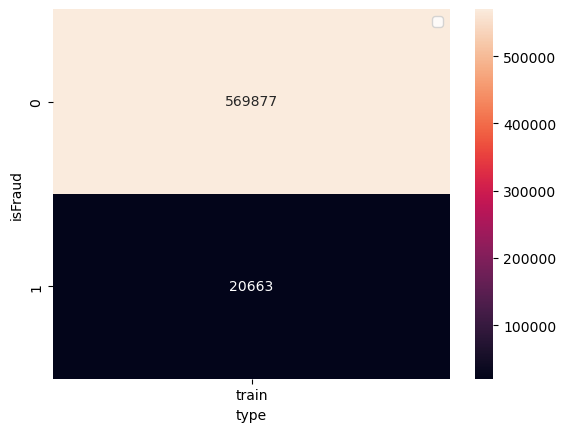

In [59]:
for col in object_col:
    plt.figure()
    sns.heatmap(pd.crosstab(train_trans['isFraud'],train_trans[col]),annot=True,fmt='d')
    plt.legend()

In [60]:
train_trans.shape

(590540, 435)

In [62]:
all_df[float_col].corr()

KeyboardInterrupt: 

In [ ]:
int_64_col=train_trans.dtypes[train_trans.dtypes=='int64'].index
print(int_64_col)


In [ ]:
train_trans[int_64_col].describe()


In [ ]:
train_id[train_id.dtypes[train_id.dtypes=='int64'].index].describe()

In [ ]:
train_trans_cat=list(train_trans.dtypes[train_trans.dtypes==object].index)
train_trans_cat+=['isFraud']
train_id_cat=list(train_id.dtypes[train_id.dtypes==object].index)
print(train_trans_cat)
print(train_id_cat)

In [ ]:


# Compter les occurrences de chaque catégorie
category_counts = train_trans['isFraud'].value_counts()

# Créer un graphique à barres
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.xlabel('Catégorie')
plt.ylabel('Nombre d\'occurrences')
plt.title('Distribution des catégories')
plt.show()


In [ ]:
print('unbalanced data set')


In [ ]:
data_cat=train_trans[train_trans_cat]
for cat in train_trans_cat:
    print("the feature '{}' has '{}'categories".format(cat,len(train_trans[cat].unique())))

In [ ]:

for cat in train_trans_cat:
# Compter les occurrences de chaque catégorie
  category_counts = train_trans[cat].value_counts()

# Créer un graphique à barres
  plt.figure(figsize=(7, 4))
  category_counts.plot(kind='bar')
  plt.xlabel('Catégorie')
  plt.ylabel('Nombre d\'occurrences')
  plt.title(cat)
  plt.show()

In [ ]:
train_trans_num=list(col for col in train_trans.columns if col not in train_trans_cat)
print(train_trans_num)

In [ ]:
train_id